In [ ]:
! jupyter nbconvert plot-Copy1.ipynb --to slides --post serve

[NbConvertApp] Converting notebook plot-Copy1.ipynb to slides
[NbConvertApp] Writing 1826888 bytes to plot-Copy1.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.1.0
Serving your slides at http://127.0.0.1:8000/plot-Copy1.slides.html
Use Control-C to stop this server



<img src="https://s-i.huffpost.com/gen/2272350/images/n-THANKSGIVING-628x314.jpg" width="800">
 # Predicting BMI and dietary habits with machine learning

_by: Phuah Wee Liang_




### Scope
---

Obesity is a rising global epidemic. Recent reports indicate that in just seven years, Singapore could reach a tipping point and lose valuable ground in fighting obesity.The aim of my studies is to try and predict 
- if the household's mean BMI is above or below the overweight range (24.9) based on their weekly food purchase. 
- if their weekly purchase will be healthy based on household characteristics like expenditures,income,assets ,etc

This is attempted through the implementation of different Machine Learning models and techniques.

### Data Sets
---
My data sets came from the USDA's National Household Food Acquisition and Purchase Survey (FoodAPS). A survey of 4,826 American households was conducted to collect unique and comprehensive data about household food purchases and acquisitions. The data sets consists of 11 separated csv files. I have utilised the following 4 files:
- faps_fahnutrients.csv
- faps_fafhnutrient_puf.csv
- faps_individual_puf.csv
- faps_household_puf.csv

In [4]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)
pd.set_option('display.max_rows', None)
data_dict = pd.read_csv('./data_dictionary.csv')
data_dict1 = pd.read_csv('./data_dictionary1.csv')
data_dict2 = pd.read_csv('./data_dictionary2.csv')

## Data Dictionaries
---
###  faps_fahnutrients.csv and faps_fafhnutrient_puf.csv
Both the data set has a total 143,050 rows and 130 columns.
- The faps_fahnutrients.csv file provides details on the Food-at-Home nutrients for each FAH item in the Food Acquisition and Purchase Survey.
- The faps_fafhnutrient_puf.csv file provides details on the Food-away-from-Home (FAFH) nutrients for each FAFH item in the Food Acquisition and Purchase Survey.

I created a dataframe for each file consisting of 16 columns extracted from it. Both dataframes' data dictionaries are the same. 



In [5]:
data_dict

,Column Name,dtype,Description,Example
0,hhnum,integer,6-digit unique identifier for each household (address),100381
1,usdadescmain,strings,USDA food category,"Sweet potato, raw, unprepared"
2,a_drinks,float,Alcoholic beverages,1.2
3,solid_fats,float,Solid fats,1.2
4,add_sugars,float,Foods defined as added sugars,1.2
5,d_total,float,"Total milk, yogurt, cheese, and whey",1.2
6,pf_total,float,"Total meat, poultry, seafood, organ & cured meats, eggs, soy, nuts and seeds",1.2
7,f_other,float,Total whole fruits and fruit juices,1.2
8,g_total,float,Total whole and refined grains,1.2
9,v_total,float,"Total dark green, red, and orange, starchy, and other vegetables",1.2


### faps_individual_puf.csv
The faps_individual_puf.csv file provides details on the individual-level variables collected through interview instruments in the National Household Food Acquisition and Purchase Survey (FoodAPS). The data set has a total 14,318 rows and 77 columns. 
The BMI and their corresponding household number 'hhnum' are extracted from the csv file and used to create a new dataframe. Primary respondents were asked to report the height and weight of each individual in the household.Reported height and weight have been used to compute the Body Mass Index (BMI) for individuals 2 years old (24 months) or older.

In [6]:
data_dict1

,Column Name,dtype,Description,Example
0,hhnum,integer,6-digit unique identifier for each household (address),100381.0
1,BMI,float,Individual's calculated Body Mass Index,24.8


### faps_household_puf.csv
The faps_household_puf.csv file provides provides details on the household-level variables collected through interview instruments in the National Household Food Acquisition and Purchase Survey. The data file faps_household_puf contains one record for each of the 4,826 households that completed both initial and final interviews. FoodAPS households are uniquely identified by the variable HHNUM. A new dataframe with 132 colums and 4826 rows are extracted. 


In [7]:
data_dict2

,Column_Name,dtype,Description,Example
0,hhnum,integer,6-digit unique identifier for each household (address),100228.000000
1,nonmetro,integer,Household does not reside in a Census core-based statistical area,1.000000
2,region,integer,Census region,3.000000
3,rural,integer,Household is in a rural Census tract,1.000000
4,famsize,integer,Number of people in residence related to the respondent,5.000000
5,inchhavg_r,float,Household average (monthly) income as sum of average imputed income per member,4667.330000
6,pctpovguidehh_r,float,INCHHAVG_R as percent of HH,207.360089
7,selfemployhh,integer,Anyone in household is self- employed,0.000000
8,jobchangeany,integer,Someone in household changed jobs within the last 3 months,1.000000
9,earnlessnum_r,integer,"Number in household changed jobs w/in last 3 months, earning less",0.000000



<img src="https://cdn.foe.co.uk/sites/default/files/styles/hero_image/public/media/images/vegetarian%20meal%20preparation.jpg?itok=MaInoXDu" width="700">
 
 
 
 
 ## Preprocessing data 


In [8]:

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
from scipy import stats
from scipy.stats import norm, skew
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,RidgeCV, LassoCV, ElasticNetCV,LogisticRegression,LogisticRegressionCV
#from yellowbrick.features.rankd import Rank2D, Rank1D
from sklearn.feature_selection import RFE
from sklearn.feature_extraction.text import CountVectorizer
from fancyimpute import MICE,KNN
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from nltk.corpus import stopwords
import string
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from category_encoders.binary import BinaryEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import warnings 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


I created two class for preprocessing. The BmiPreprocessor() contains the following functions:
- the_get_food_features() function is used to extract the food key words from theusdadescmain column.Group the food key words by their household number. Split them into individual food key words. Use CounVetorizer to covert each foods key word into a feature and saved them to a new dataframe. Return this dataframe with the food features.

- the _combine_df() function takes in two dataframe. Create another dataframe from the individual input dataframe with the nutrients exctract out. Combine both new dataframes into one. Combine this newly created dataframe with the dataframe containing the food features and return as one dataframe.

- the get_bmi() function Extract BMI and hhnum column. Replace column containing'V' and 'E'.Impute NAN values and return.

- the transform function() Takes in three dataframe. Call the  self.get_bmi(),self._get_food_features(), self._get_food_features() and self._combine_df().Return a single dataframe to be used as features

In [9]:
class BmiPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names = []
        
    def _get_food_onelist(self,df):
        '''Extract the food key words from theusdadescmain column.
        Return a new dataframe with one column 'food' that contains the food key words  '''
        df.usdadescmain.dropna(inplace=True)
        df['food'] = df.usdadescmain.map(lambda x: x.split(',')[0])
        df.food.dropna(inplace=True)
        df=df[['hhnum','food']]
        return df
    
    def get_food_list(self,df,df1):
        '''Combine both dataframe after _get_food_onelist extract the food key words from 
            usdadescmain column. '''
        X=self._get_food_onelist(df)
        X1=self._get_food_onelist(df1)
        X2=X1.combine_first(X)
        df=X2
        df=df.set_index('hhnum')
        return df

    
    def _get_food_features(self, df,df2):
        '''Extract the food key words from theusdadescmain column.
        Group the food key words by their household number.Split them into individual food key words.
        Use CounVetorizer to covert each foods key into a feature and saved to a new dataframe.
        Return this dataframe with the food feature dataframe.
        '''
        
        df.usdadescmain.fillna('nil',inplace=True)
        df['food'] = df.usdadescmain.map(lambda x: x.split(',')[0])
        df.food.dropna(inplace=True)
        df_temp=df[['hhnum','a_drinks', 'solid_fats', 'add_sugars', 'd_total', 'pf_total', 'f_total', 'g_total', 'v_total'
              ,'energy','carb' , 'dietfiber' , 'totsug' , 'totfat' , 'alcohol','protein']]
        df=df[['hhnum','food']]
        df_temp=df_temp.groupby("hhnum").mean()
        df.fillna('nil',inplace=True)
        df=df.set_index('hhnum')
        df.food=df.food.apply(lambda x: x + '_')
        df=df.reset_index().groupby("hhnum").sum()
        df.food=df.food.apply(lambda x:x.replace('_',','))
        df = df.combine_first(df2)
        df.fillna('nil',inplace=True)
        cv = CountVectorizer(max_df=0.9 , max_features=1600,binary=True,lowercase=False,analyzer=lambda x: x.split(','))
        food_desc = cv.fit_transform(df.food)
        cv.get_feature_names()
        food_df = pd.DataFrame(food_desc.toarray(), columns=cv.get_feature_names())
        food_df.set_index(df.index,inplace=True)
        df=food_df
        df=df.combine_first(df_temp)
        return df
    
    def get_bmi(self,df2):
        
        '''Extract BMI and hhnum column. Replace column containing'V' and 'E'.
           Impute NAN values and return.
        '''
        df2=df2[['HHNUM','BMI']]
        df2=df2.rename(columns={'HHNUM':'hhnum'})
        df2=df2.replace('V',np.nan)
        df2=df2.replace('E',np.nan)
        df2.BMI=df2.BMI.astype('float')
        df2=df2.set_index('hhnum')
        solver=MICE()
        bmi=solver.complete(df2.values)
        bmi=pd.DataFrame(bmi)
        bmi.index=df2.index
        bmi.columns=df2.columns
        bmi=pd.DataFrame(bmi.groupby('hhnum')['BMI'].mean())
        df2=bmi
        return df2
    
    def _combine_df(self,df,df1):
        
        '''Takes in two dataframe.
        Create another dataframe from the individual input dataframe with the nutrients exctract out. 
        Combine both new dataframes into one.
        Combine this newly created dataframe with the dataframe containing the food features 
        and return as one dataframe.
        '''
        
        df_temp=df[['a_drinks', 'solid_fats', 'add_sugars', 'd_total', 'pf_total', 'f_total', 'g_total', 'v_total'
              ,'energy','carb' , 'dietfiber' , 'totsug' , 'totfat' , 'alcohol','protein']] 
        
        df_temp1=df1[['a_drinks', 'solid_fats', 'add_sugars', 'd_total', 'pf_total', 'f_total', 'g_total', 'v_total'
              ,'energy','carb' , 'dietfiber' , 'totsug' , 'totfat' , 'alcohol','protein']]
        df_temp2=df_temp+df_temp1
        df=df.drop(['a_drinks', 'solid_fats', 'add_sugars', 'd_total', 'pf_total', 'f_total', 'g_total', 'v_total'
              ,'energy','carb' , 'dietfiber' , 'totsug' , 'totfat' , 'alcohol','protein'] ,axis=1)
        df=df.combine_first(df_temp2)
        df=df.combine_first(df1)
        df.fillna(0.0,inplace=True)
        return df
    
    def transform(self, X, X1, X2, *args):
        ''' Takes in three dataframe.
        Call self.get_bmi(),self._get_food_features()
        self._get_food_features() and self._combine_df()
        Return a single dataframe to be used as features'''
        
        X2=self.get_bmi(X2)
        X = self._get_food_features(X,X2)
        X1=self._get_food_features(X1,X2)
        X=self._combine_df(X,X1)
        return X

    def fit(self, X, *args):
        return self

The HHPreprocessor() contains the following functions:
- The _get_features() drop columns that contains correlated information and columns that describe the survey structure. Combine all expense into one column. Split the categorical features that are ranking in nature. One hot encode them. Combine all dataframe into one and return the dataframe as features.

- The_get_target() take in a dataframe. Compare the food code in the usdafoodcat4 columns with the code in food list. The food code in these list are group based on their quality and rank accordingly. The food code in the usdafoodcat4 will be replace with the food ranking score. They will then be group according to their household number. The dataframe is then return to be used as target.


In [10]:
class HHPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def _get_features(self, df):
        '''Drop columns that contains correlated information and columns that describe the survey structure.
        Combine all expense into one column. Split the categorical features that are ranking in nature.
        One hot encode them. Combine all dataframe into one and return the dataframe '''
        ID=[col for col in df.columns if 'placeid' in col]
        df=df.drop(ID,axis=1)
        why=[col for col in df.columns if 'whynot' in col]
        df=df.drop(why,axis=1)
        guest=[col for col in df.columns if 'guest' in col]
        df=df.drop(guest,axis=1)
        init=[col for col in df.columns if 'init' in col]
        df=df.drop(init,axis=1)
        start=[col for col in df.columns if 'start' in col]
        df=df.drop(start,axis=1)
        size=[col for col in df.columns if 'size' in col]
        size.remove('famsize')
        df=df.drop(size,axis=1)
        secure=[col for col in df.columns if 'foodsecure' in col]
        df=df.drop(secure,axis=1)
        snap=[col for col in df.columns if 'snap' in col]
        snap=[i for i in snap if i not in {'snapnowhh','primstoresnaptype','altstoresnaptype'}]
        df=df.drop(snap,axis=1)
        inch=[col for col in df.columns if 'inch' in col]
        inch.remove('inchhavg_r')
        df=df.drop(inch,axis=1)
        df.shape
        unit=[col for col in df.columns if 'unit' in col]
        df=df.drop(unit,axis=1)
        benest=[col for col in df.columns if 'benest' in col]
        df=df.drop(benest,axis=1)
        feedback=[col for col in df.columns if 'feedback' in col]
        df=df.drop(feedback,axis=1)
        df=df.set_index('hhnum')
        target_design=['tsstrata','tspsu','hhwgt','targetgroup','matchconsenthh','incfamavg_r','incfamreported_r','incworksheet'
              ,'selfemployfoodhh','jobchangecat','anyvehicle','caraccess','schservebrkfst','wiccategelig','anypregnant'
              ,'adltfscat','primstoreedit_type','primstoreedit_filltype','altstoreedit_filltype','altstoreedit_type'
              ]
        df=df.drop(target_design,axis=1) 
        pov=[col for col in df.columns if 'pov' in col]
        pov.remove('pctpovguidehh_r')
        df=df.drop(pov,axis=1)
        exp=[col for col in df.columns if 'exp' in col]
        exp.remove('largeexp')
        ex=df[exp]
        ex.head()
        ex['total']=ex.exprentmrtg_r+ex.exphomeins_r+ex.expproptax_r+ex.exppubtrans_r+ex.expelectric_r+ex.expheatfuel_r+ex.expwastedisp_r+ ex.exphealthins_r+ex.expcopay_r+ex.expdoctor_r+ex.exprx_r+ex.expchildcare_r+ex.expchildsupport_r+ex.expadultcare_r
        df=df.drop(exp,axis=1)
        df['expense_total']=ex['total']
        df=df.replace({-996:np.nan,-997:np.nan})
        obj=df.select_dtypes(include = ['object']).columns.tolist()
        df=df.drop(obj,axis=1)
        df1=df.values
        knn=KNN()
        df1=knn.complete(df1)
        df1=pd.DataFrame(df1)
        df1.columns=df.columns
        df1.index=df.index
        df=df1
        df_float=df.select_dtypes(include = ['float64'])
        df_int=df.select_dtypes(include = ['int64'])
        df_int.columns
        num=['ndinnersouthh','nmealshome','nmealstogether','famsize']
        cat=['altstoretype','primstoretype']
        df_int[cat]=df_float[cat]
        df_float=df_float.drop(cat,axis=1)
        rank=['region','housingown','liqassets','vehiclenum','foodsufficient','fruitsveg','fincondition','billsontimefreq','grocerylistfreq'
     ,'primstoretravelmode','foodstorenum','dietstatuspr','dietstatushh','nutritionfacts','billrevfreq','payaboveminfreq'
     ,'altstoretype','primstoretype','altstorereason']
        df_enc=df[rank]
        df_enc=df_enc.replace({-996:np.nan,-997:np.nan})
        df_enc1=df_enc.values
        #df_enc1=knn.complete(df_enc1)
        df_enc1=df_enc1.astype(int)
        df_enc1=pd.DataFrame(df_enc1)
        df_enc1.columns=df_enc.columns
        df_enc1.index=df_enc.index
        bin_encoder = BinaryEncoder()
        df_bin = bin_encoder.binary(df_enc1)
        df_int=df_int.replace({-996:np.nan,-997:np.nan})
        df_int1=df_int.values
        #df_int1=knn.complete(df_int)
        df_int1=df_int1.astype(int)
        df_int1=pd.DataFrame(df_int1)
        df_int1.columns=df_int.columns
        df_int1.index=df_int.index
        df_int=pd.concat([df_int,df_bin],axis=1)
        df_int1=df_int
        df_int1=knn.complete(df_int)
        df_int1=df_int1.astype(int)
        df_int1=pd.DataFrame(df_int1)
        df_int1.columns=df_int.columns
        df_int1.index=df_int.index
        df=pd.concat([df_float,df_int1],axis=1)
        return df
    
    def _get_target(self, df):
        '''
        Take in a dataframe. Compare the food code in the usdafoodcat4 columns with the code in food list. 
        The food code in these list are group based on their quality and rank accordingly. The food code in the 
        usdafoodcat4 will be replace with the food ranking score. They will then be group according to their 
        household number. The dataframe is then return to be used as target.
        '''
        junk=[3206,3504,3602,3702,4404,4602,5002,5004,5006,5008,5202,5004,5006,5008,5202,5502,5504,5506,5702,5802,5704,5804,5806,7102
     ,7104,7202,7204,7206,7502,7506,7802,7804,8004,8010,8412,8802,8804,8806,9012,6804,7106]
        
        moderate=[1002,1004,1006,1008,1202,1204,1206,1402,1404,2602,2604,2606,2608,3204,3402,3208,3404,3502,3506,3704,3708,4204,
         4206,4208,4402,4604,4804,5402,6806,7002,7004,7006,7008,7208,7302,7304,7504,8002,8006,8008,8012,8402,8404,8406,
         9002,9010,9202,9402,9404,9406,2204,3706,6804,7802,7804,8410,5204,3703,1208]
        
        good=[1602,1604,1802,1804,2806,3002,3004,3006,3202,3406,3802,4002,4004,4202,4802,5404,6016,8404,9004,9006,9008,9802
     ,6802,9204]
        
        healthy=[2002,2004,2006,2008,2010,2202,2206,2402,2404,6002,6004,6006,6008,6010,6012,6014,6018,6402,6404,6406,6408,6410,
        6412,6414,6418,6416,6420,6422,8408,2502,7704,2804,2802,7702]
        
        df.usdafoodcat4=df.usdafoodcat4.apply(lambda x: 4 if x in junk  else x)
        df.usdafoodcat4=df.usdafoodcat4.apply(lambda x : 3 if x in moderate else x)
        df.usdafoodcat4=df.usdafoodcat4.apply(lambda x : 2 if x in good else x)
        df.usdafoodcat4=df.usdafoodcat4.apply(lambda x: 1 if x in healthy else x)
        
        df=df.fillna(3.0)
        df=df.replace(9999,3.0)
        df=pd.DataFrame(df.groupby(['hhnum'])['usdafoodcat4'].mean())
        return df
    
    def target_score(self,df,df1,df2):
        ''' Takes in three dataframe.
        Call self._get_target() and self._get_features()
        Return a single dataframe to be used as features'''
        
        X=self._get_target(df)
        X1=self._get_target(df1)
        X2=self._get_features(df2)
        X['score']=X.usdafoodcat4+X1.usdafoodcat4
        df=X.drop(['usdafoodcat4'],axis=1)
        solver=MICE()
        df_temp=solver.complete(df.values)
        df_temp=pd.DataFrame(df_temp)
        df_temp.index=df.index
        df_temp.columns=df.columns
        df=df_temp
        df_temp2=pd.DataFrame(X2.nonmetro)
        df=df.combine_first(df_temp2)
        df.drop(['nonmetro'],axis=1)
        df=df.score#<df.score.mean()
        return df

    def transform(self, X, *args):
        X=self._get_features(X)
        return X

    def fit(self, X, *args):
        return self

I have created a few functions for ploting graphs and  printing scores.

In [49]:
def plot_lr_coef(logreg,x):
    ''' Takes in the logistic regression model.
        Plot the top 10 important coef '''
    coef = pd.Series(logreg.coef_[0], index=x.columns).sort_values()
    df=coef.tail(10)
    df=df.append(coef.head(10))
    df.plot(kind='barh', y='importance',x='feature',figsize=(18,13),title='coef', sort_columns=False)
    

def plot_rf_fi(rf,x):
    ''' Takes in the random forest model.
        Plot the top 20 important features '''
    fi_clif = pd.DataFrame({'feature':x.columns,'importance':rf.feature_importances_})
    fi_clif.sort_values('importance', ascending=False, inplace=True)
    fi_clif.head(20)
    plot=fi_clif.head(20).plot(kind='barh', y='importance',x='feature', figsize=(18,13), title='Feature importances', 
         sort_columns=False)
    return plot

def cv_scores(model,x_train,y_train,x_test,y_test):
    ''' Take in any model and print their cross val score and confusion matrix'''
    
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    actual=pd.Series(y_test,name='Actual').reset_index(drop=True)
    y_pred=model.predict(x_test)
    model=scores
    #print('Accuracy score for logistic regression is {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(np.std(scores))))
    print(pd.crosstab(actual, pd.Series(y_pred,name='Predicted'), margins=True))
    print(classification_report(y_test, y_pred))
    return model

def scores(model,x_test,y_test):
    ''' Take in any model and print confusion matrix only'''
    actual=pd.Series(y_test,name='Actual').reset_index(drop=True)
    y_pred=model.predict(x_test)
    
    print(pd.crosstab(actual, pd.Series(y_pred,name='Predicted'), margins=True))
    print(classification_report(y_test, y_pred))

def plot_bmi_food(food,y):
    ''' Plot the top 10 food of highest and lowest 50 BMI'''
    index=y.BMI.sort_values(ascending=False).head(50).index
    food_high=food[food.index.isin(index)]
    a=pd.DataFrame(food_high.food.value_counts())
    a.drop('nil',inplace=True)
    a=a.head(10)
    plt.figure(figsize=(18,10))
    plt.xticks(rotation=45)
    plt.title('Top 10 Food purchased among 50 highest BMI ')
    sns.set(font_scale=1.2)
    plot=sns.barplot(data=a.T);
    
    index2=y.BMI.sort_values().head(50).index
    food_low=food[food.index.isin(index2)]
    b=pd.DataFrame(food_low.food.value_counts())
    b.drop('nil',inplace=True)
    b=b.head(10)
    plt.figure(figsize=(18,10))
    plt.xticks(rotation=45)
    plt.title('Top 10 Food purchased among 50 lowest BMI ')
    sns.set(font_scale=1.2)
    plot2=sns.barplot(data=b.T);
    return plot,plot2

    

def plot_nutrient(X,y):
    ''' Plot the top 10 nutrients in food of highest and lowest 50 BMI'''
    nutrient=X[['a_drinks', 'solid_fats', 'add_sugars', 'd_total', 'pf_total', 'f_total', 'g_total', 'v_total'
              ,'energy','carb' , 'dietfiber' , 'totsug' , 'totfat' , 'alcohol','protein']]
    index=y.BMI.sort_values(ascending=False).head(50).index
    index2=y.BMI.sort_values().head(50).index
    nutrient_high=nutrient[nutrient.index.isin(index)]
    nutrient_high=nutrient_high.mean()
    nutrient_high.drop('energy',inplace=True)
    nut_high=ss.fit_transform(nutrient_high.reshape(-1,1))
    c=pd.DataFrame(nut_high)
    c.index=nutrient_high.index
    c=abs(c)
    nutrient_low=nutrient[nutrient.index.isin(index2)]
    nutrient_low=nutrient_low.mean()
    nutrient_low.drop('energy',inplace=True)
    nut_low=ss.fit_transform(nutrient_low.reshape(-1,1))
    d=pd.DataFrame(nut_low)
    d.index=nutrient_low.index
    d=abs(d)
    ax=d.plot(kind='bar',color='red',position=0.1)
    plot=c.plot(kind='bar',figsize=(18,9),fontsize=12,ax=ax,
                title='Nutrients in Food purchased among 50 highest vs lowest BMI ',rot=45).legend(['Lowest 50 BMI','Highest 50 BMI'])
    return plot



In [12]:
ss=StandardScaler()
warnings.simplefilter('ignore')

In [13]:
dfa = pd.read_csv('./CSV data files/faps_fahnutrients.csv')
dfb=pd.read_csv('./CSV data files/faps_fafhnutrient_puf.csv')
dfc = pd.read_csv('./CSV data files/faps_individual_puf.csv')
dfd = pd.read_csv('./CSV data files/faps_household_puf.csv')

In [16]:
bmi=BmiPreprocessor();
X=bmi.transform(dfa,dfb,dfc);
y=bmi.get_bmi(dfc);
food=bmi.get_food_list(dfa,dfb);

[MICE] Completing matrix with shape (14317, 1)
[MICE] Starting imputation round 1/110, elapsed time 0.001
[MICE] Starting imputation round 2/110, elapsed time 0.002
[MICE] Starting imputation round 3/110, elapsed time 0.003
[MICE] Starting imputation round 4/110, elapsed time 0.004
[MICE] Starting imputation round 5/110, elapsed time 0.005
[MICE] Starting imputation round 6/110, elapsed time 0.005
[MICE] Starting imputation round 7/110, elapsed time 0.006
[MICE] Starting imputation round 8/110, elapsed time 0.007
[MICE] Starting imputation round 9/110, elapsed time 0.008
[MICE] Starting imputation round 10/110, elapsed time 0.009
[MICE] Starting imputation round 11/110, elapsed time 0.010
[MICE] Starting imputation round 12/110, elapsed time 0.011
[MICE] Starting imputation round 13/110, elapsed time 0.012
[MICE] Starting imputation round 14/110, elapsed time 0.013
[MICE] Starting imputation round 15/110, elapsed time 0.014
[MICE] Starting imputation round 16/110, elapsed time 0.015
[M


<img src="https://alittleyum.files.wordpress.com/2015/10/mealbox-grocery-spread.jpg" width="800">
 
 
 
 
 ## Exploring data analysis
From the data sets, we are able to obtain some insights on the houshold surveyed. First we looked at the mean household BMI distribution. 


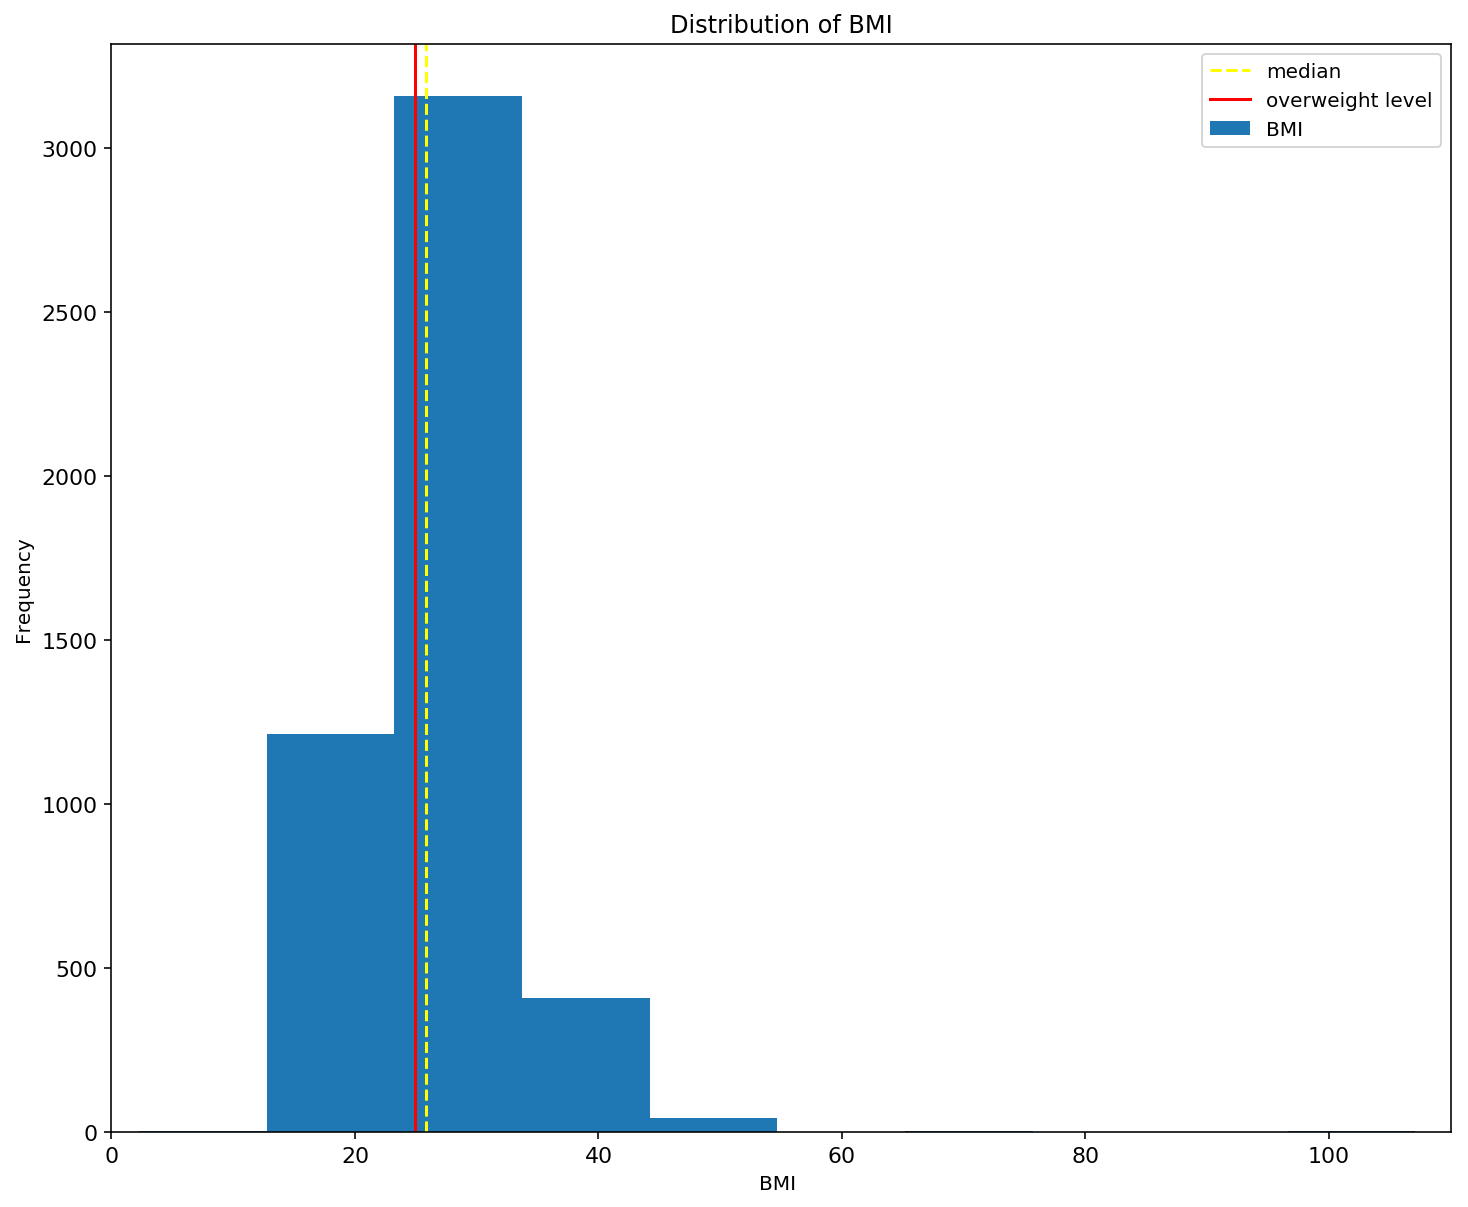

In [17]:
y.BMI.plot(kind='hist',  
            title='Distribution of BMI',
            fontsize=11, figsize=(12,10))
plt.xlabel('BMI ')
plt.xlim(0,110)
# add median and mean lines
plt.axvline(np.median(y.BMI), linestyle='dashed', c='yellow', label='median')
plt.axvline(24.9, c='red', label='overweight level')
plt.legend(loc='best');

The histogram shows a slight majority of the household surveyed falls over the overweight level.The median BMI is also above the overweight level.



<img src="https://wallpaperscraft.com/image/potatoes_fries_coke_ice_hamburger_bun_sesame_vegetables_tomatoes_onions_patty_cheese_ketchup_fast_food_77805_3840x2160.jpg" width="600">
 
 
 
Next we look at the the top 10 food choices among 50 highest BMI and compare them with the food choices among 50 lowest BMI. 
We will also look at the nutrients content of their food choices.



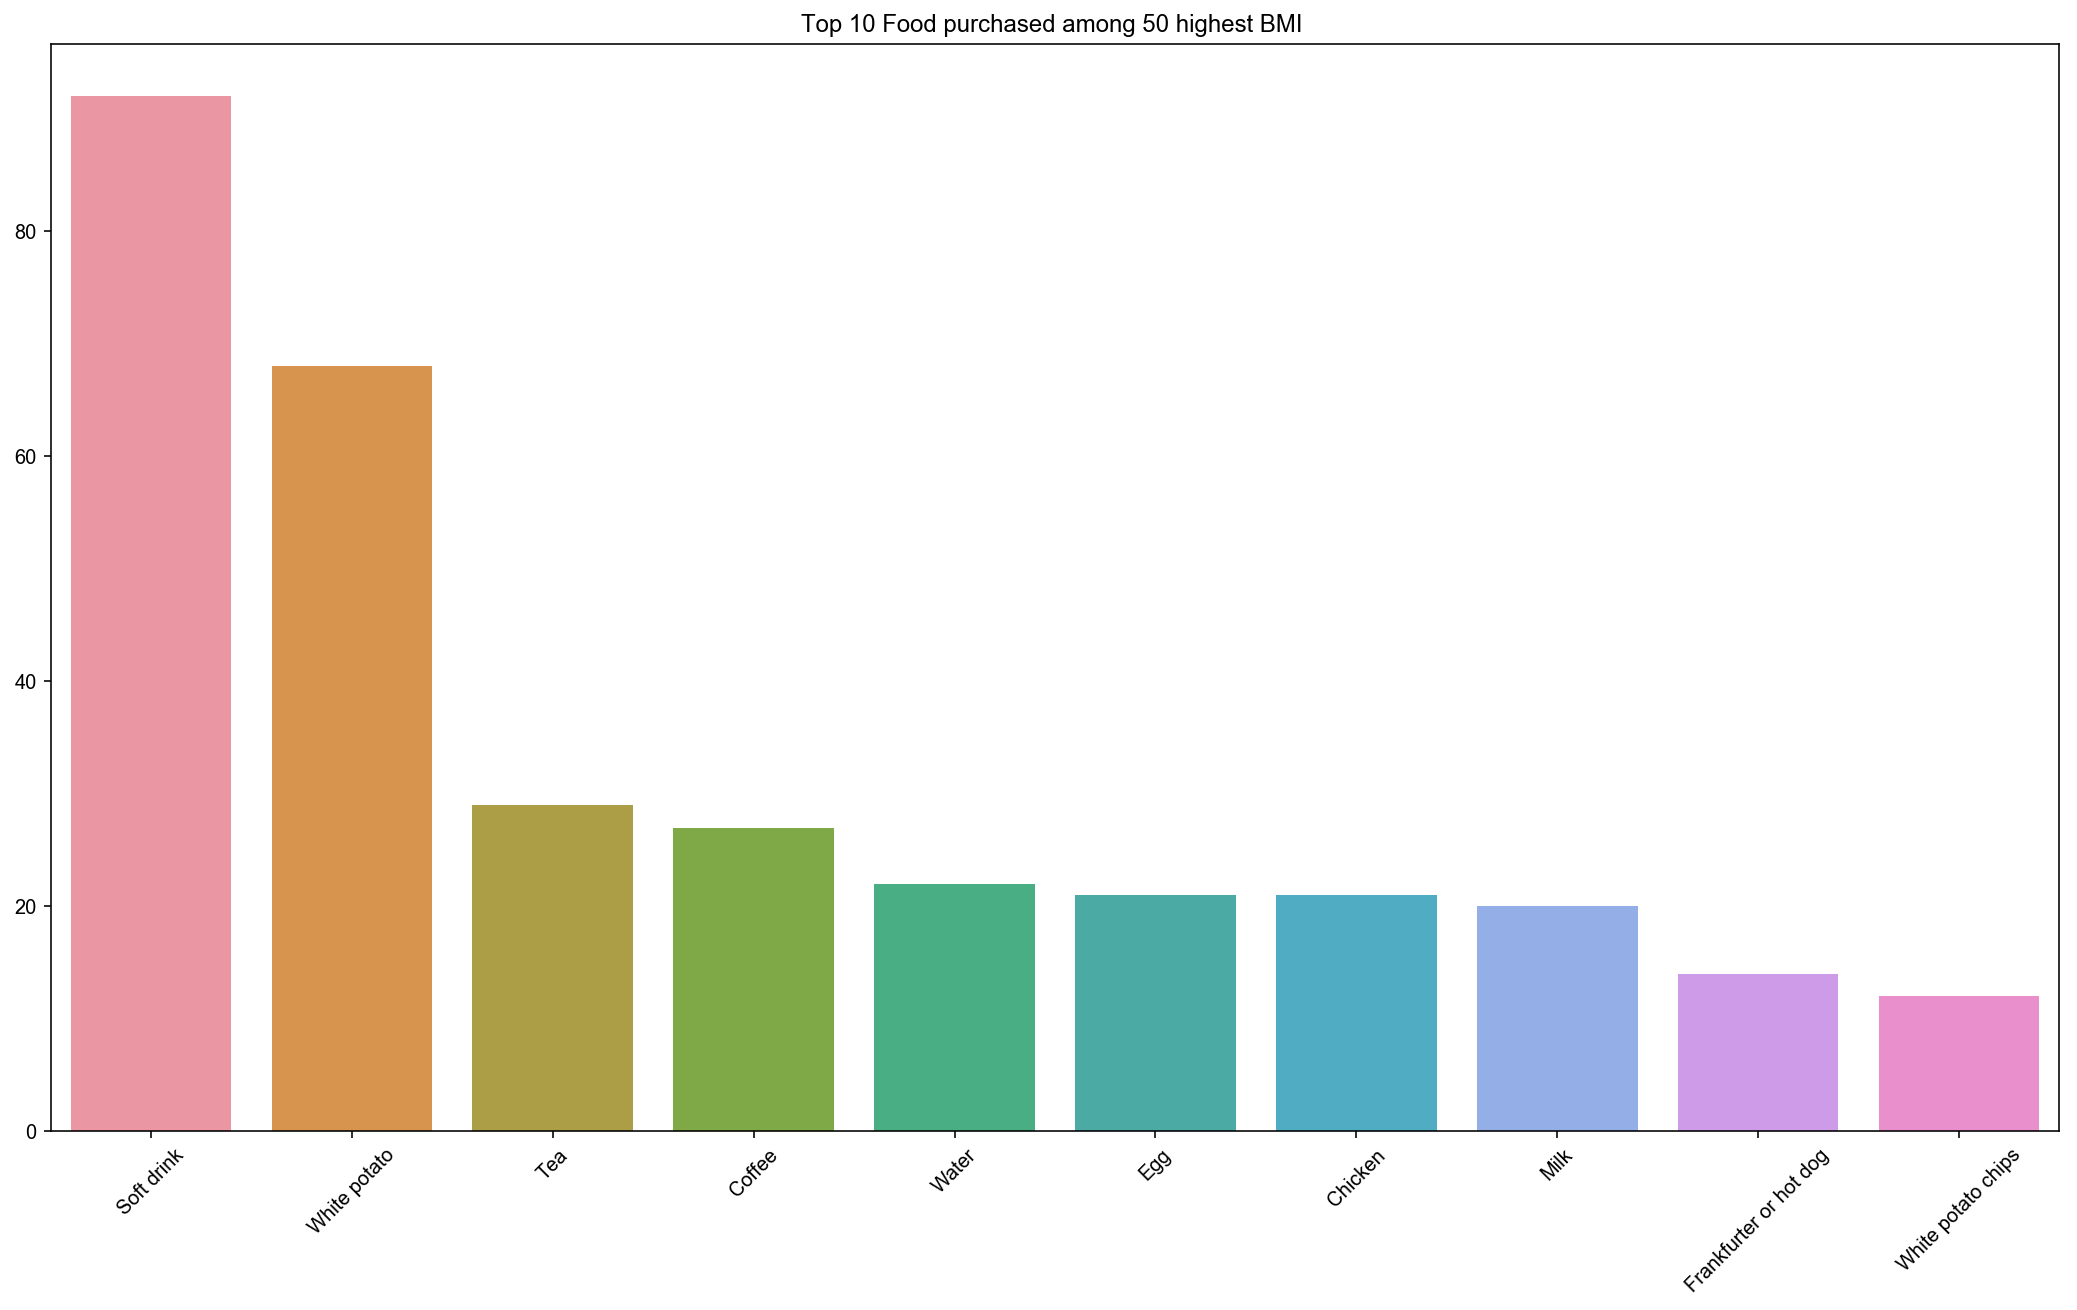

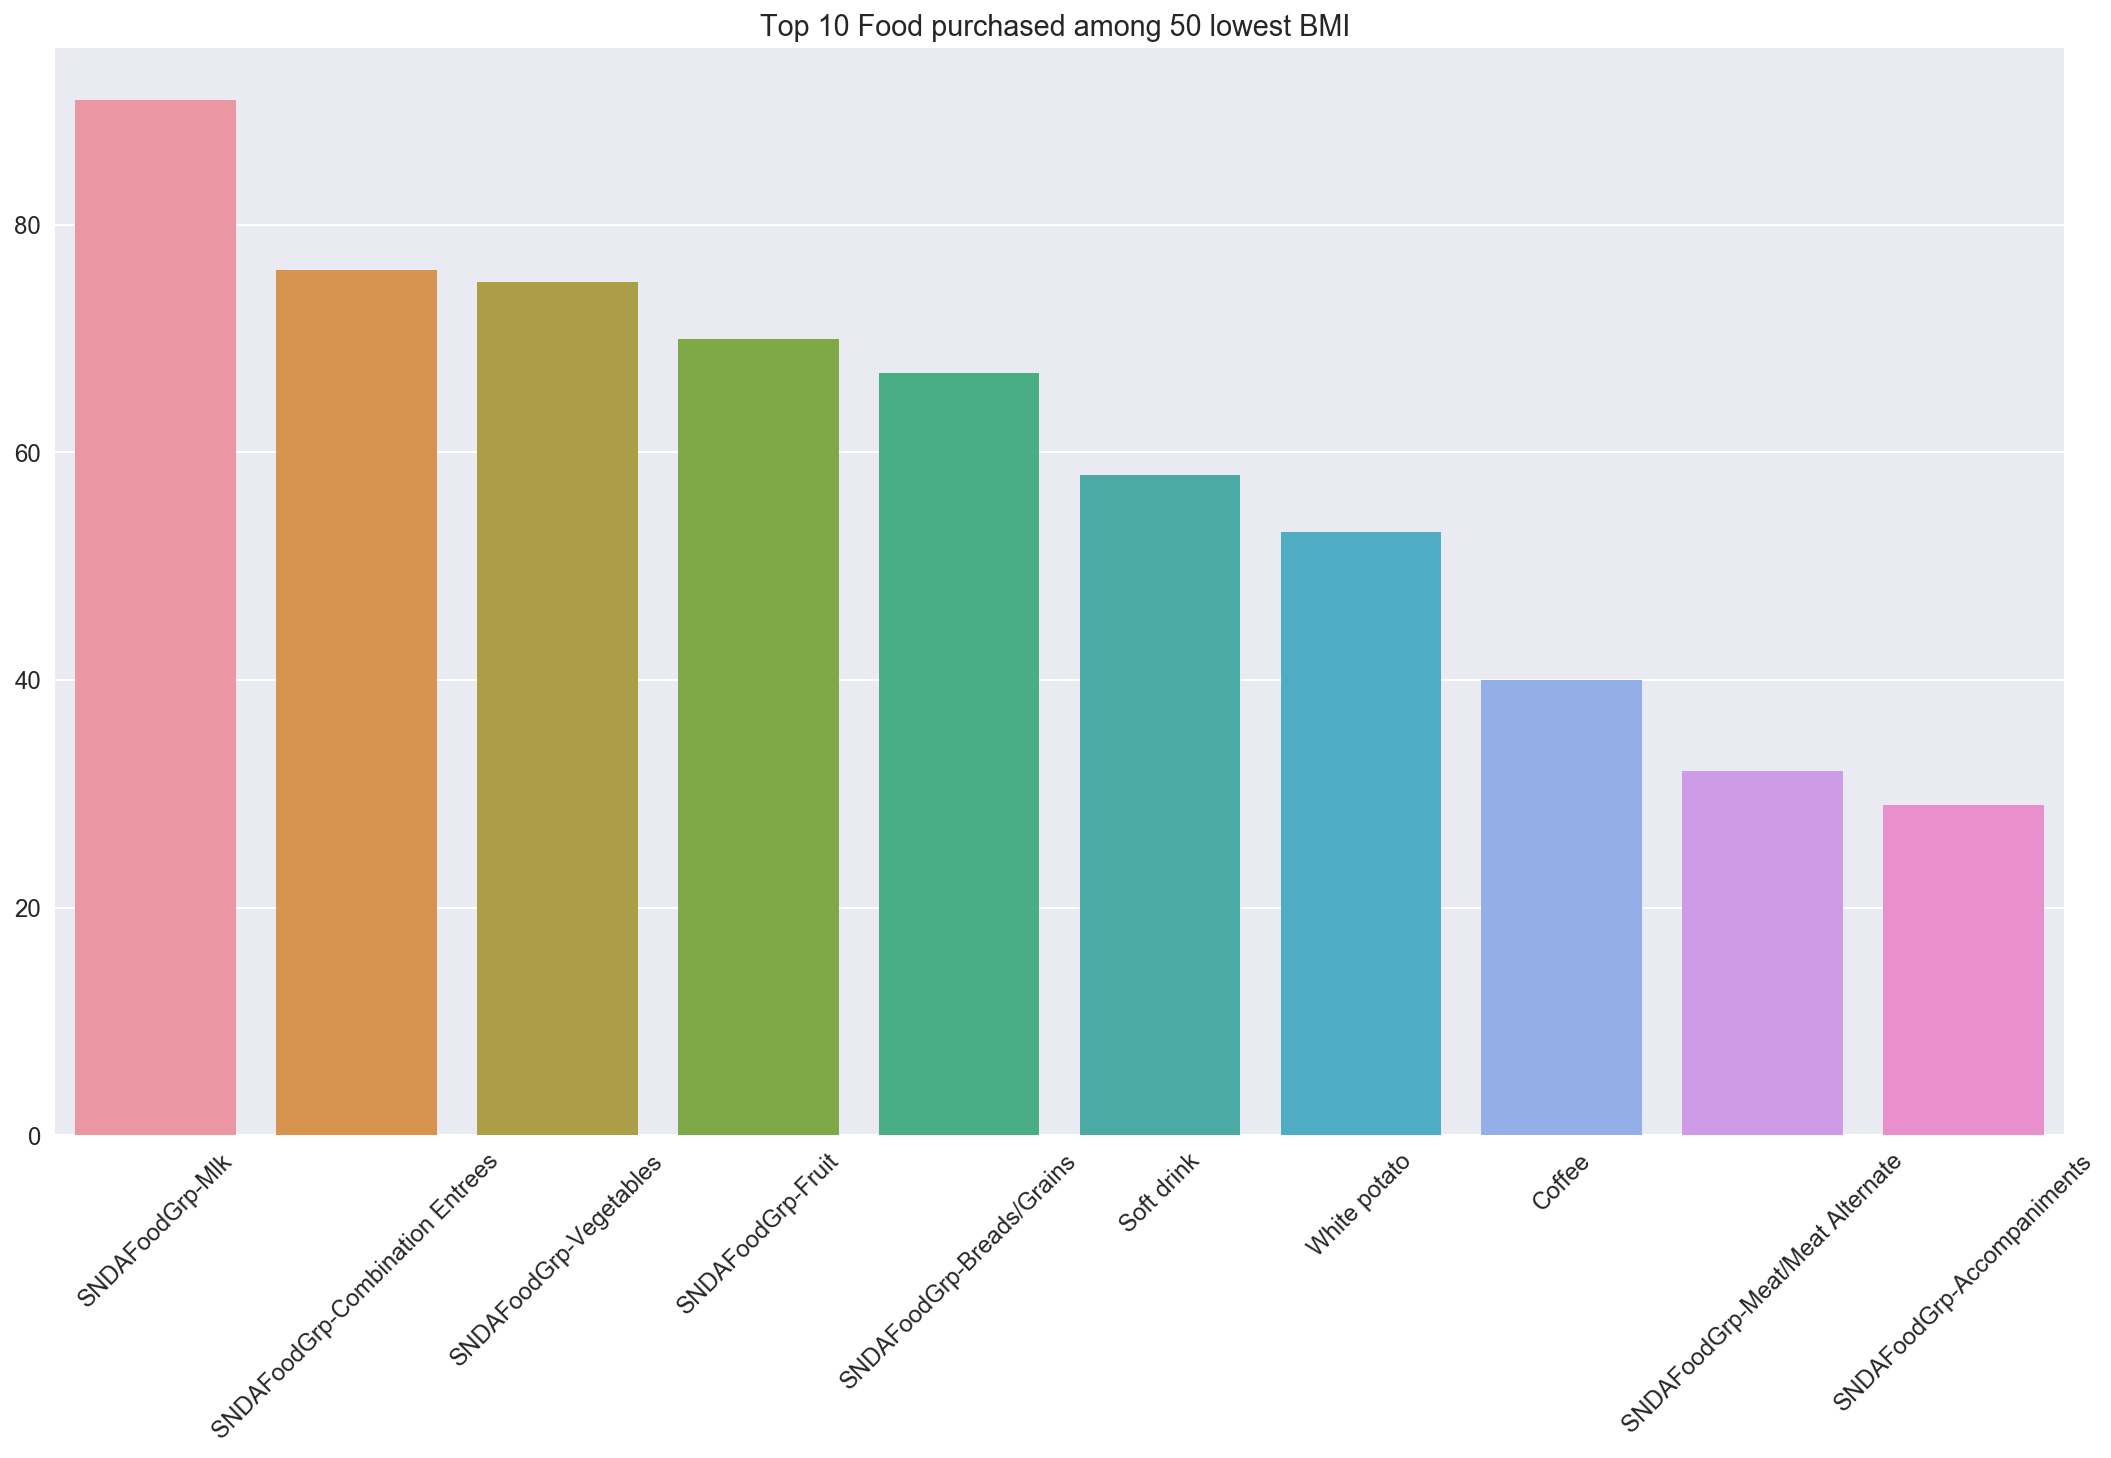

In [18]:
plot_bmi_food(food,y);

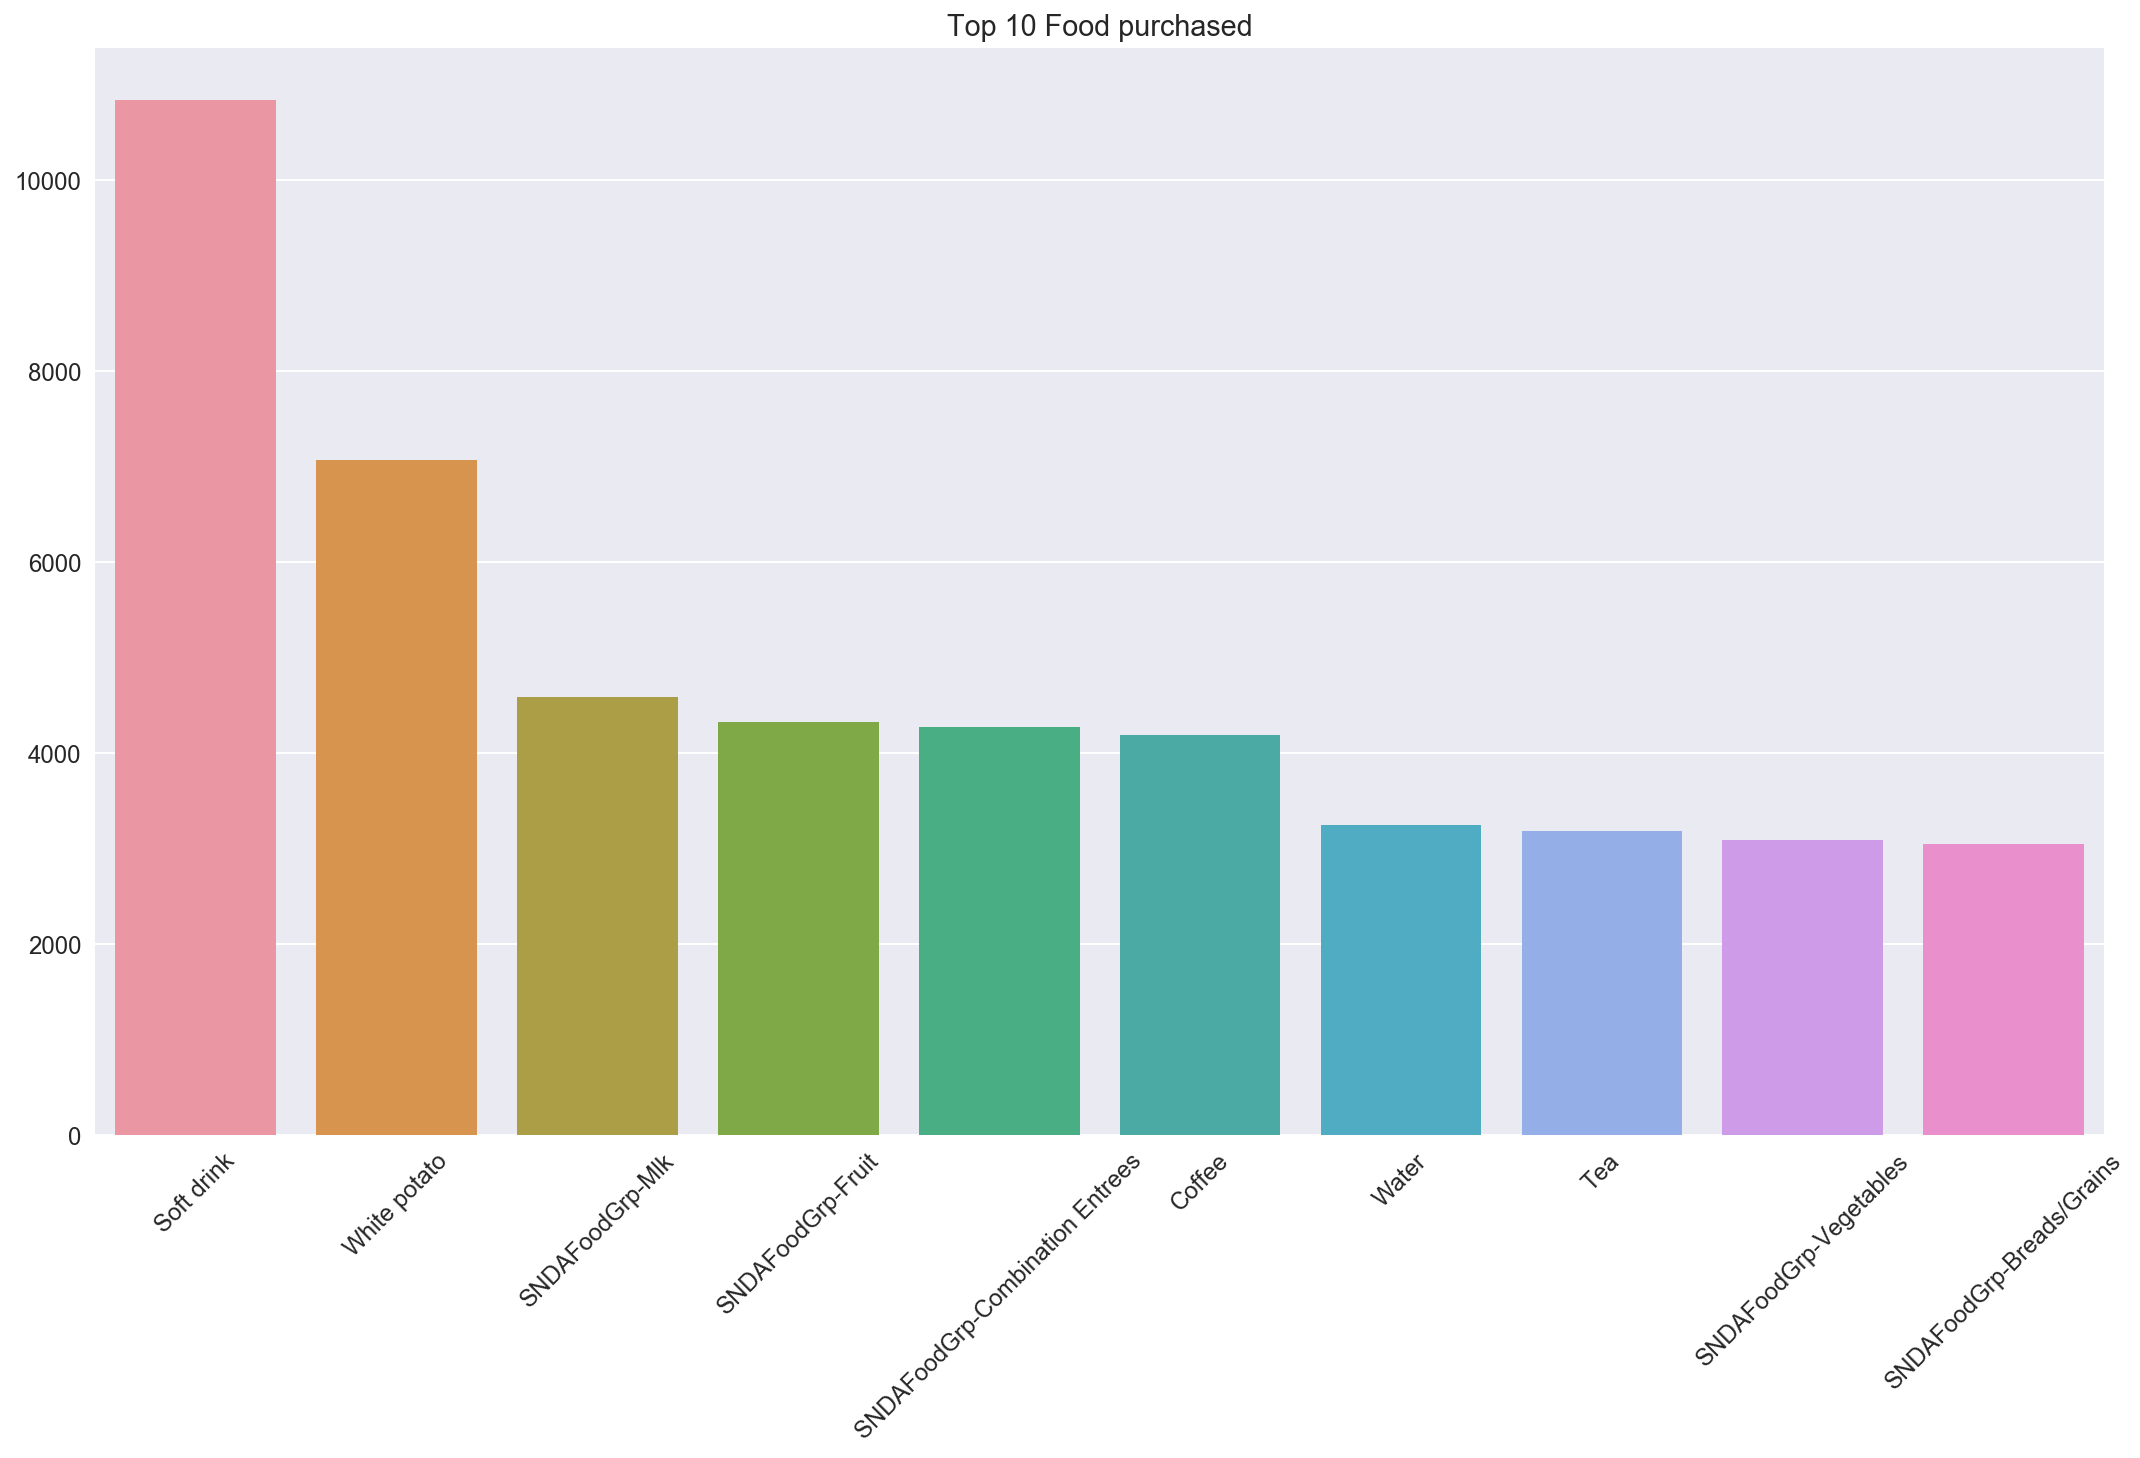

In [19]:
s=pd.DataFrame(food.food.value_counts().head(10))
plt.figure(figsize=(18,10))
plt.xticks(rotation=45)
plt.title('Top 10 Food purchased')
sns.set(font_scale=1.2)
sns.barplot(data=s.T);

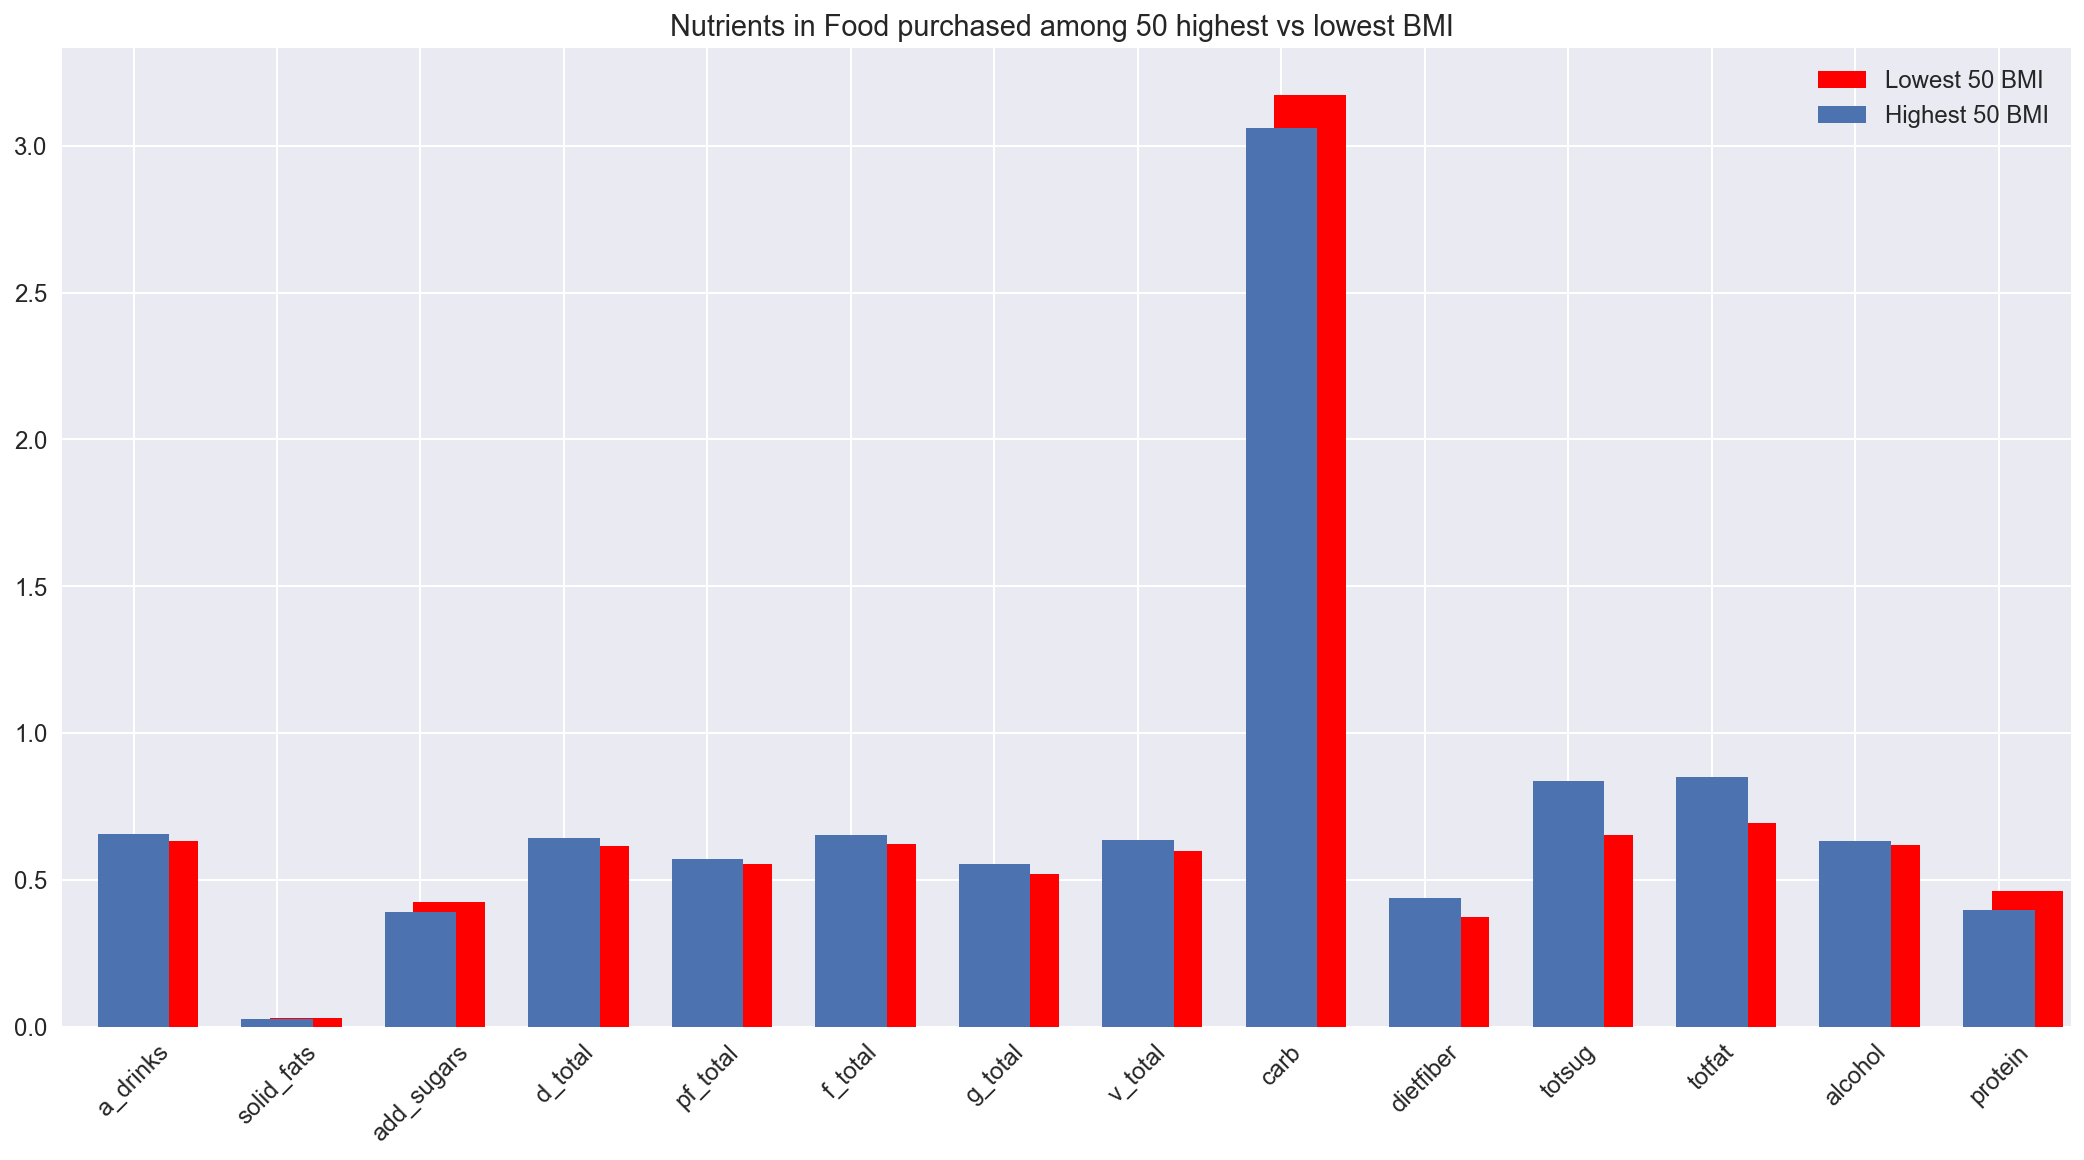

In [20]:
plot_nutrient(X,y);

Based of the graph above, one striking observation is the fact that the top 50 BMI group consumed way more soft drinks than the lowest 50 BMI group.
Another observation is that carbohydrates consumption is much higher compared to the rest of the nutrients. Consumption of protien is low in comparison. In fact the comsumption of sugar is higher than protein.

Next we look at the distribution score of food purchased followed by the distribution of overall income compared to the distribution income that made healthier food choices.

In [21]:
hh=HHPreprocessor()
X1=hh.transform(dfd)
y1=hh.target_score(dfa,dfb,dfd)

Imputing row 1/4826 with 5 missing, elapsed time: 19.397
Imputing row 101/4826 with 13 missing, elapsed time: 19.476
Imputing row 201/4826 with 13 missing, elapsed time: 19.574
Imputing row 301/4826 with 11 missing, elapsed time: 19.672
Imputing row 401/4826 with 22 missing, elapsed time: 19.768
Imputing row 501/4826 with 12 missing, elapsed time: 19.858
Imputing row 601/4826 with 9 missing, elapsed time: 19.935
Imputing row 701/4826 with 18 missing, elapsed time: 20.002
Imputing row 801/4826 with 19 missing, elapsed time: 20.067
Imputing row 901/4826 with 27 missing, elapsed time: 20.161
Imputing row 1001/4826 with 12 missing, elapsed time: 20.265
Imputing row 1101/4826 with 14 missing, elapsed time: 20.344
Imputing row 1201/4826 with 7 missing, elapsed time: 20.442
Imputing row 1301/4826 with 12 missing, elapsed time: 20.541
Imputing row 1401/4826 with 22 missing, elapsed time: 20.631
Imputing row 1501/4826 with 11 missing, elapsed time: 20.721
Imputing row 1601/4826 with 12 missing,

Imputing row 3901/4826 with 13 missing, elapsed time: 24.574
Imputing row 4001/4826 with 18 missing, elapsed time: 24.660
Imputing row 4101/4826 with 14 missing, elapsed time: 24.740
Imputing row 4201/4826 with 14 missing, elapsed time: 24.827
Imputing row 4301/4826 with 18 missing, elapsed time: 24.906
Imputing row 4401/4826 with 18 missing, elapsed time: 25.002
Imputing row 4501/4826 with 23 missing, elapsed time: 25.090
Imputing row 4601/4826 with 18 missing, elapsed time: 25.176
Imputing row 4701/4826 with 10 missing, elapsed time: 25.267
Imputing row 4801/4826 with 16 missing, elapsed time: 25.355
Imputing row 1/4826 with 0 missing, elapsed time: 12.336
Imputing row 101/4826 with 0 missing, elapsed time: 12.337
Imputing row 201/4826 with 0 missing, elapsed time: 12.338
Imputing row 301/4826 with 0 missing, elapsed time: 12.339
Imputing row 401/4826 with 0 missing, elapsed time: 12.340
Imputing row 501/4826 with 0 missing, elapsed time: 12.341
Imputing row 601/4826 with 0 missing, 

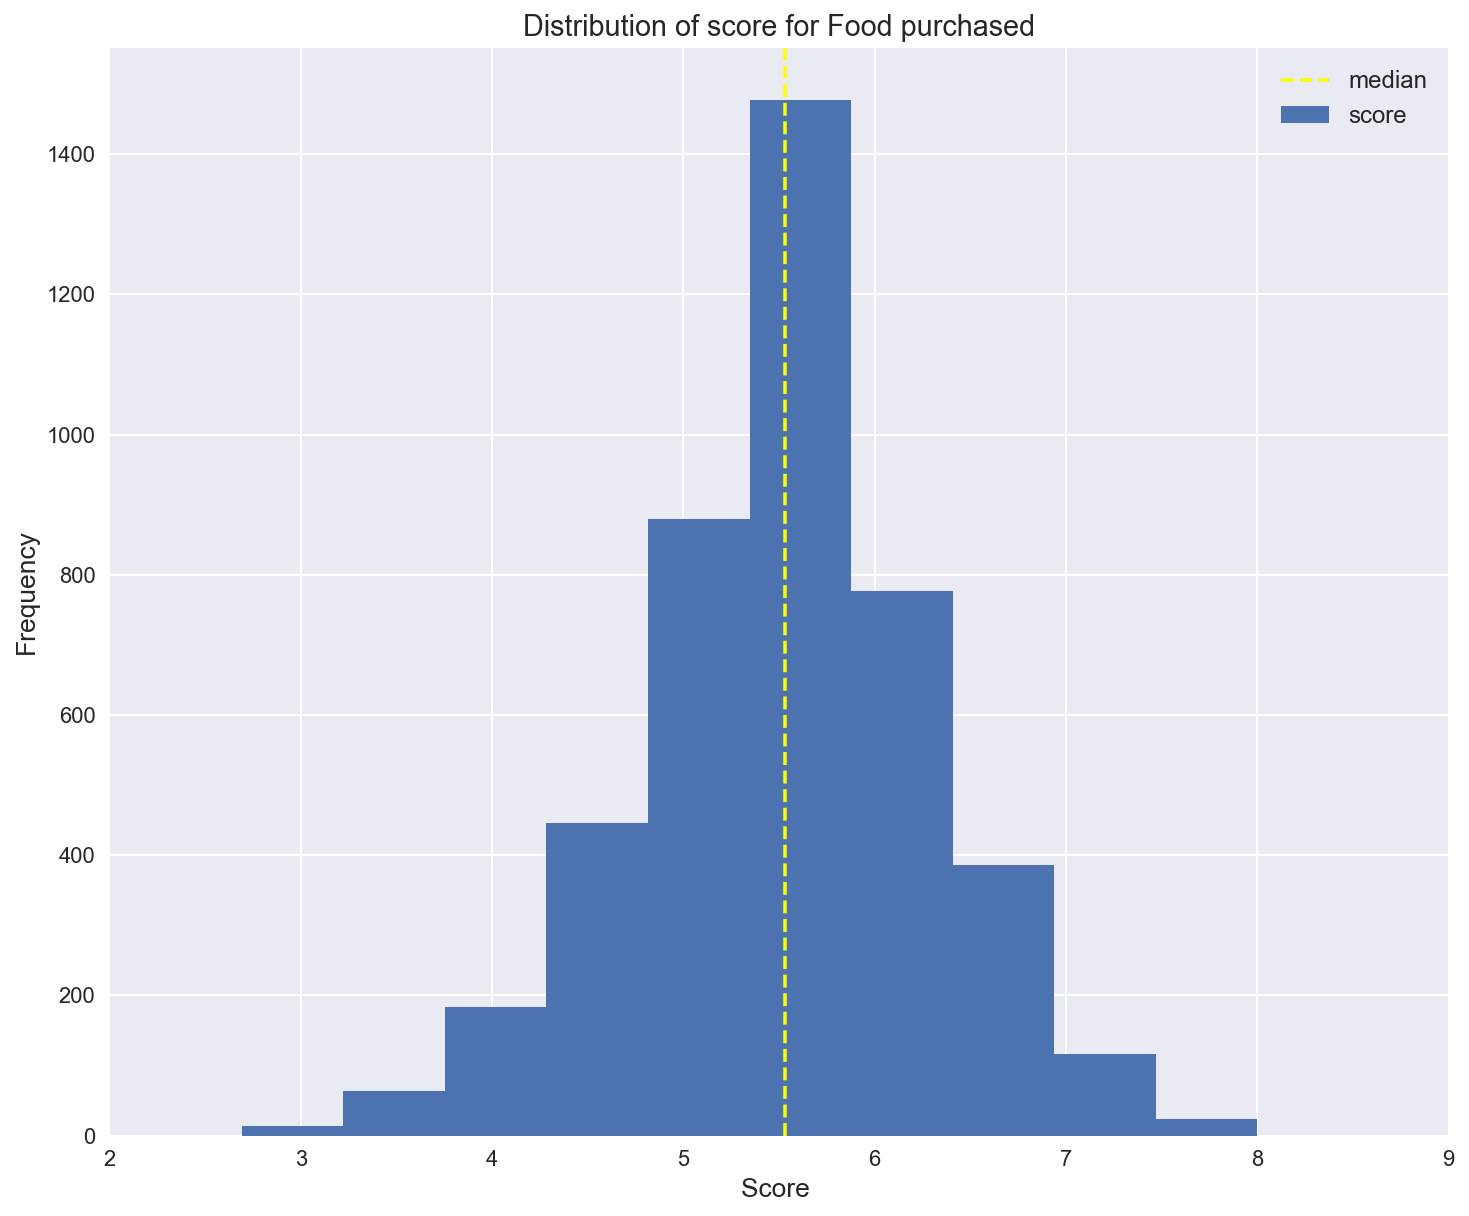

In [24]:
y1.plot(kind='hist', #bins=range(1, 110, 10), 
               title='Distribution of score for Food purchased',
               fontsize=11, figsize=(12,10))#color='blue',
plt.xlabel('Score ')
plt.xlim(2,9)
# add median and mean lines
plt.axvline(y1.median(), linestyle='dashed', c='yellow', label='median')
#plt.axvline(24.9, #linestyle='dotted', 
            #c='red', label='overweight level')
plt.legend(loc='best');

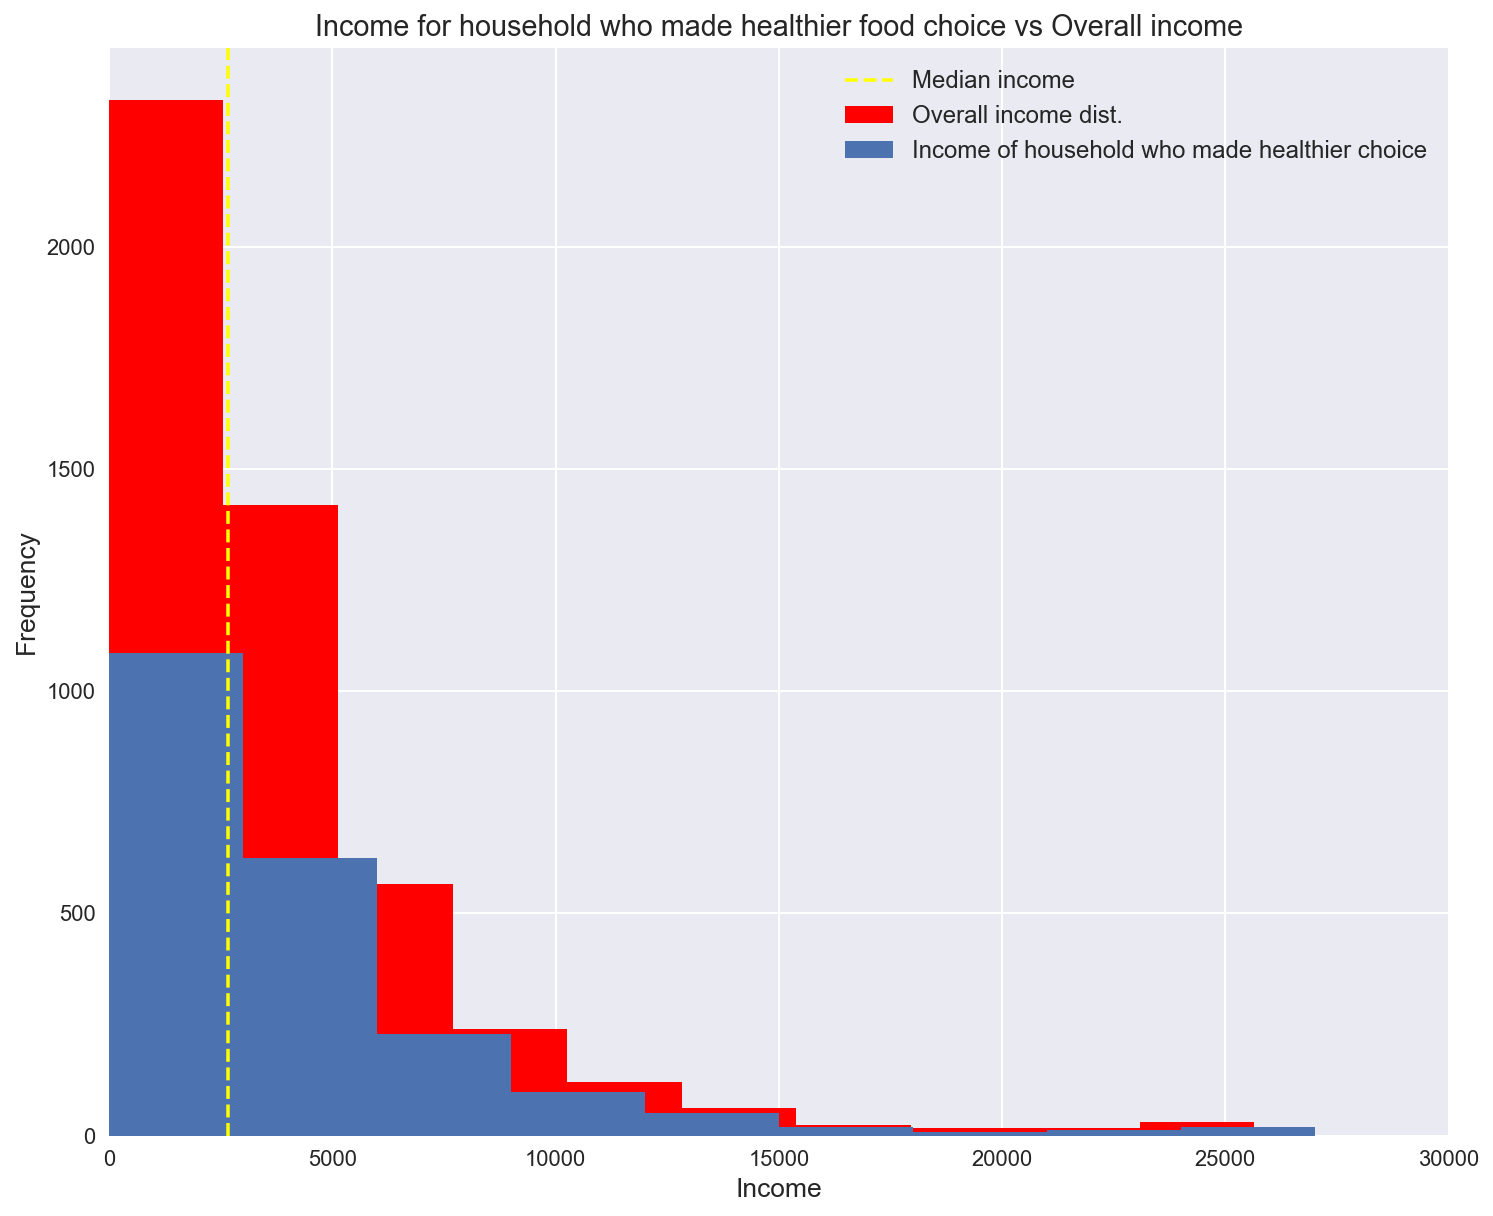

In [25]:
y2=y1[y1<y1.median()]
y2_index=y2.index
income=X1.inchhavg_r
income_health=X1.inchhavg_r[X.index.isin(y2_index)]
ax=income.plot(kind='hist',color='red')
income_health.plot(kind='hist', bins=range(1, 30000, 3000), 
               title='Income for household who made healthier food choice vs Overall income',
               fontsize=11,figsize=(12,10),ax=ax)
plt.xlabel('Income')
plt.xlim(10,30000)
# add median and mean lines
plt.axvline(income.median(), linestyle='dashed', c='yellow', label='median')
#plt.axvline(24.9, #linestyle='dotted', 
            #c='red', label='overweight level')
plt.legend(['Median income','Overall income dist.','Income of household who made healthier choice'],loc='best');

In the survey, respondents were asked to assess their dietary choices and rate them from poor,fair, good, very good and excellent. Total of 3236 rated their choices good and above.

We compared them with their actual purchase. 

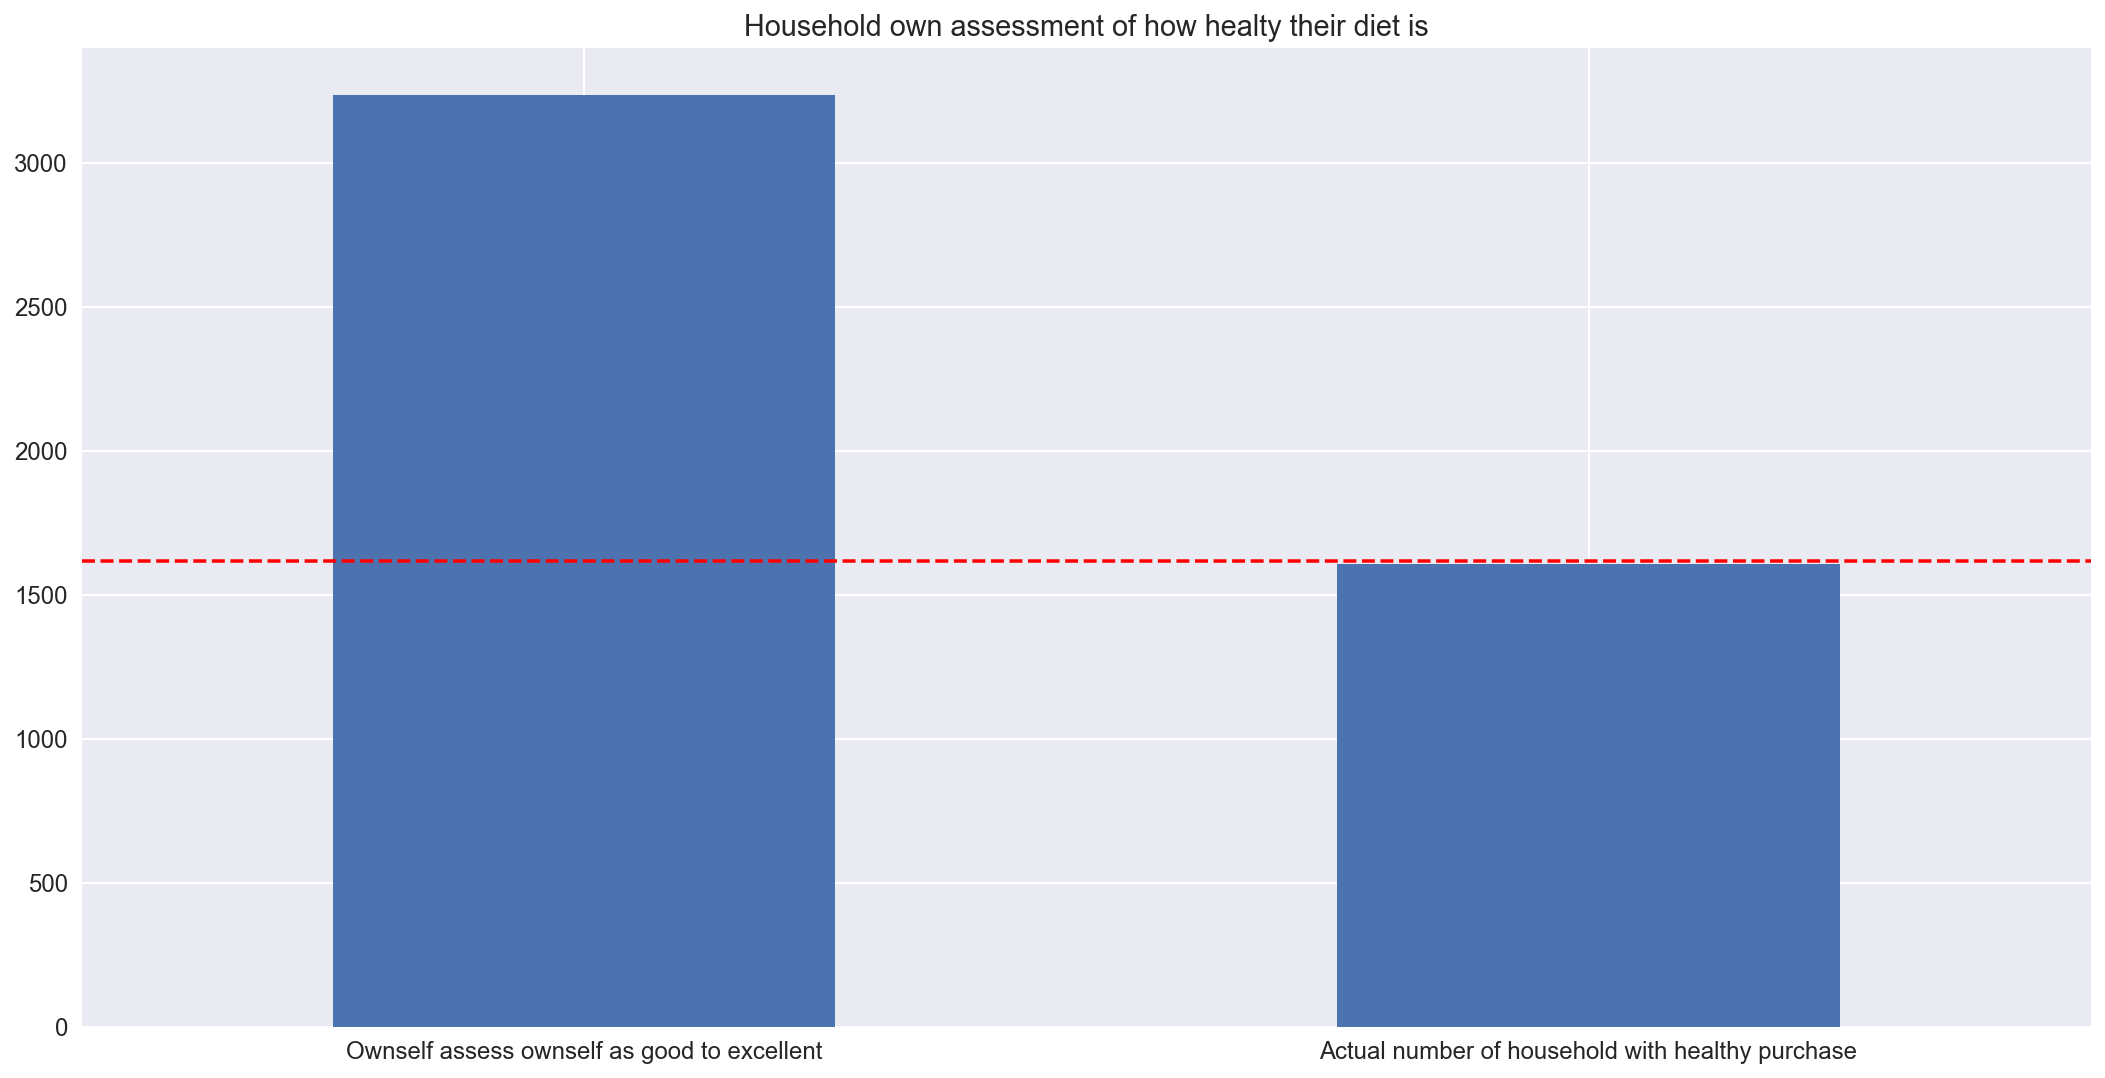

In [26]:
dietstatus=X1.dietstatuspr[X1.dietstatuspr<=3]
dietstatus_int=dietstatus.index
actual=y1[y1<y1.mean()]
a=actual[actual.index.isin(dietstatus_int)]
c=pd.Series([dietstatus.count(),a.count()])
plt.axhline(dietstatus.count()/2, linestyle='dashed', c='red', label='median')
ax=plt.subplot()
c.plot(kind='bar',figsize=(18,9),fontsize=12,
                title='Household own assessment of how healty their diet is',rot=360)
ax.set_xticklabels(labels=['Ownself assess ownself as good to excellent',
                           'Actual number of household with healthy purchase']);



<img src="https://cdn.foe.co.uk/sites/default/files/styles/body_text_image/public/media/images/casserole.jpg?itok=tjjPwvnI" width="700">
 
 
 
 
 ## Modelling for BMI lever prediction
As I am predicting a binary variable- whether the BMI will be above or below 24.9,I will use a classifier model.
I create a new binary variable that is true when the BMI is below 24.9.

In [38]:
y=y.BMI<24.9

In [28]:
baseline=y.value_counts()
baseline=float(baseline[0])/(baseline[0]+baseline[1])
baseline

0.5932449233319519


### Logistic Regression- Default parameters
The calculated baseline is 0.59. I decided to start off using Logistic Regression.From the resulting regression coefficients perhaps more insights can be obtain.  

The food purchased, together with their nutrients value are used as features. The features can be obtain by using the BmiPrecessor class created. Dataframes  from the files (faps_fahnutrients.csv,faps_fafhnutrient_puf.csv, faps_individual_puf.csv) are used.

Once process,the features and target will be splited to training and test sets.

In [37]:
bmi=BmiPreprocessor()
X=bmi.transform(dfa,dfb,dfc)
y=bmi.get_bmi(dfc)

[MICE] Completing matrix with shape (14317, 1)
[MICE] Starting imputation round 1/110, elapsed time 0.000
[MICE] Starting imputation round 2/110, elapsed time 0.001
[MICE] Starting imputation round 3/110, elapsed time 0.002
[MICE] Starting imputation round 4/110, elapsed time 0.003
[MICE] Starting imputation round 5/110, elapsed time 0.004
[MICE] Starting imputation round 6/110, elapsed time 0.005
[MICE] Starting imputation round 7/110, elapsed time 0.006
[MICE] Starting imputation round 8/110, elapsed time 0.007
[MICE] Starting imputation round 9/110, elapsed time 0.008
[MICE] Starting imputation round 10/110, elapsed time 0.009
[MICE] Starting imputation round 11/110, elapsed time 0.010
[MICE] Starting imputation round 12/110, elapsed time 0.011
[MICE] Starting imputation round 13/110, elapsed time 0.012
[MICE] Starting imputation round 14/110, elapsed time 0.013
[MICE] Starting imputation round 15/110, elapsed time 0.014
[MICE] Starting imputation round 16/110, elapsed time 0.015
[M

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [40]:
ss = StandardScaler()
lr = LogisticRegression()
lr_pipe = Pipeline(steps=[('ss', ss),('logreg', lr)])

In [41]:
lr_pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

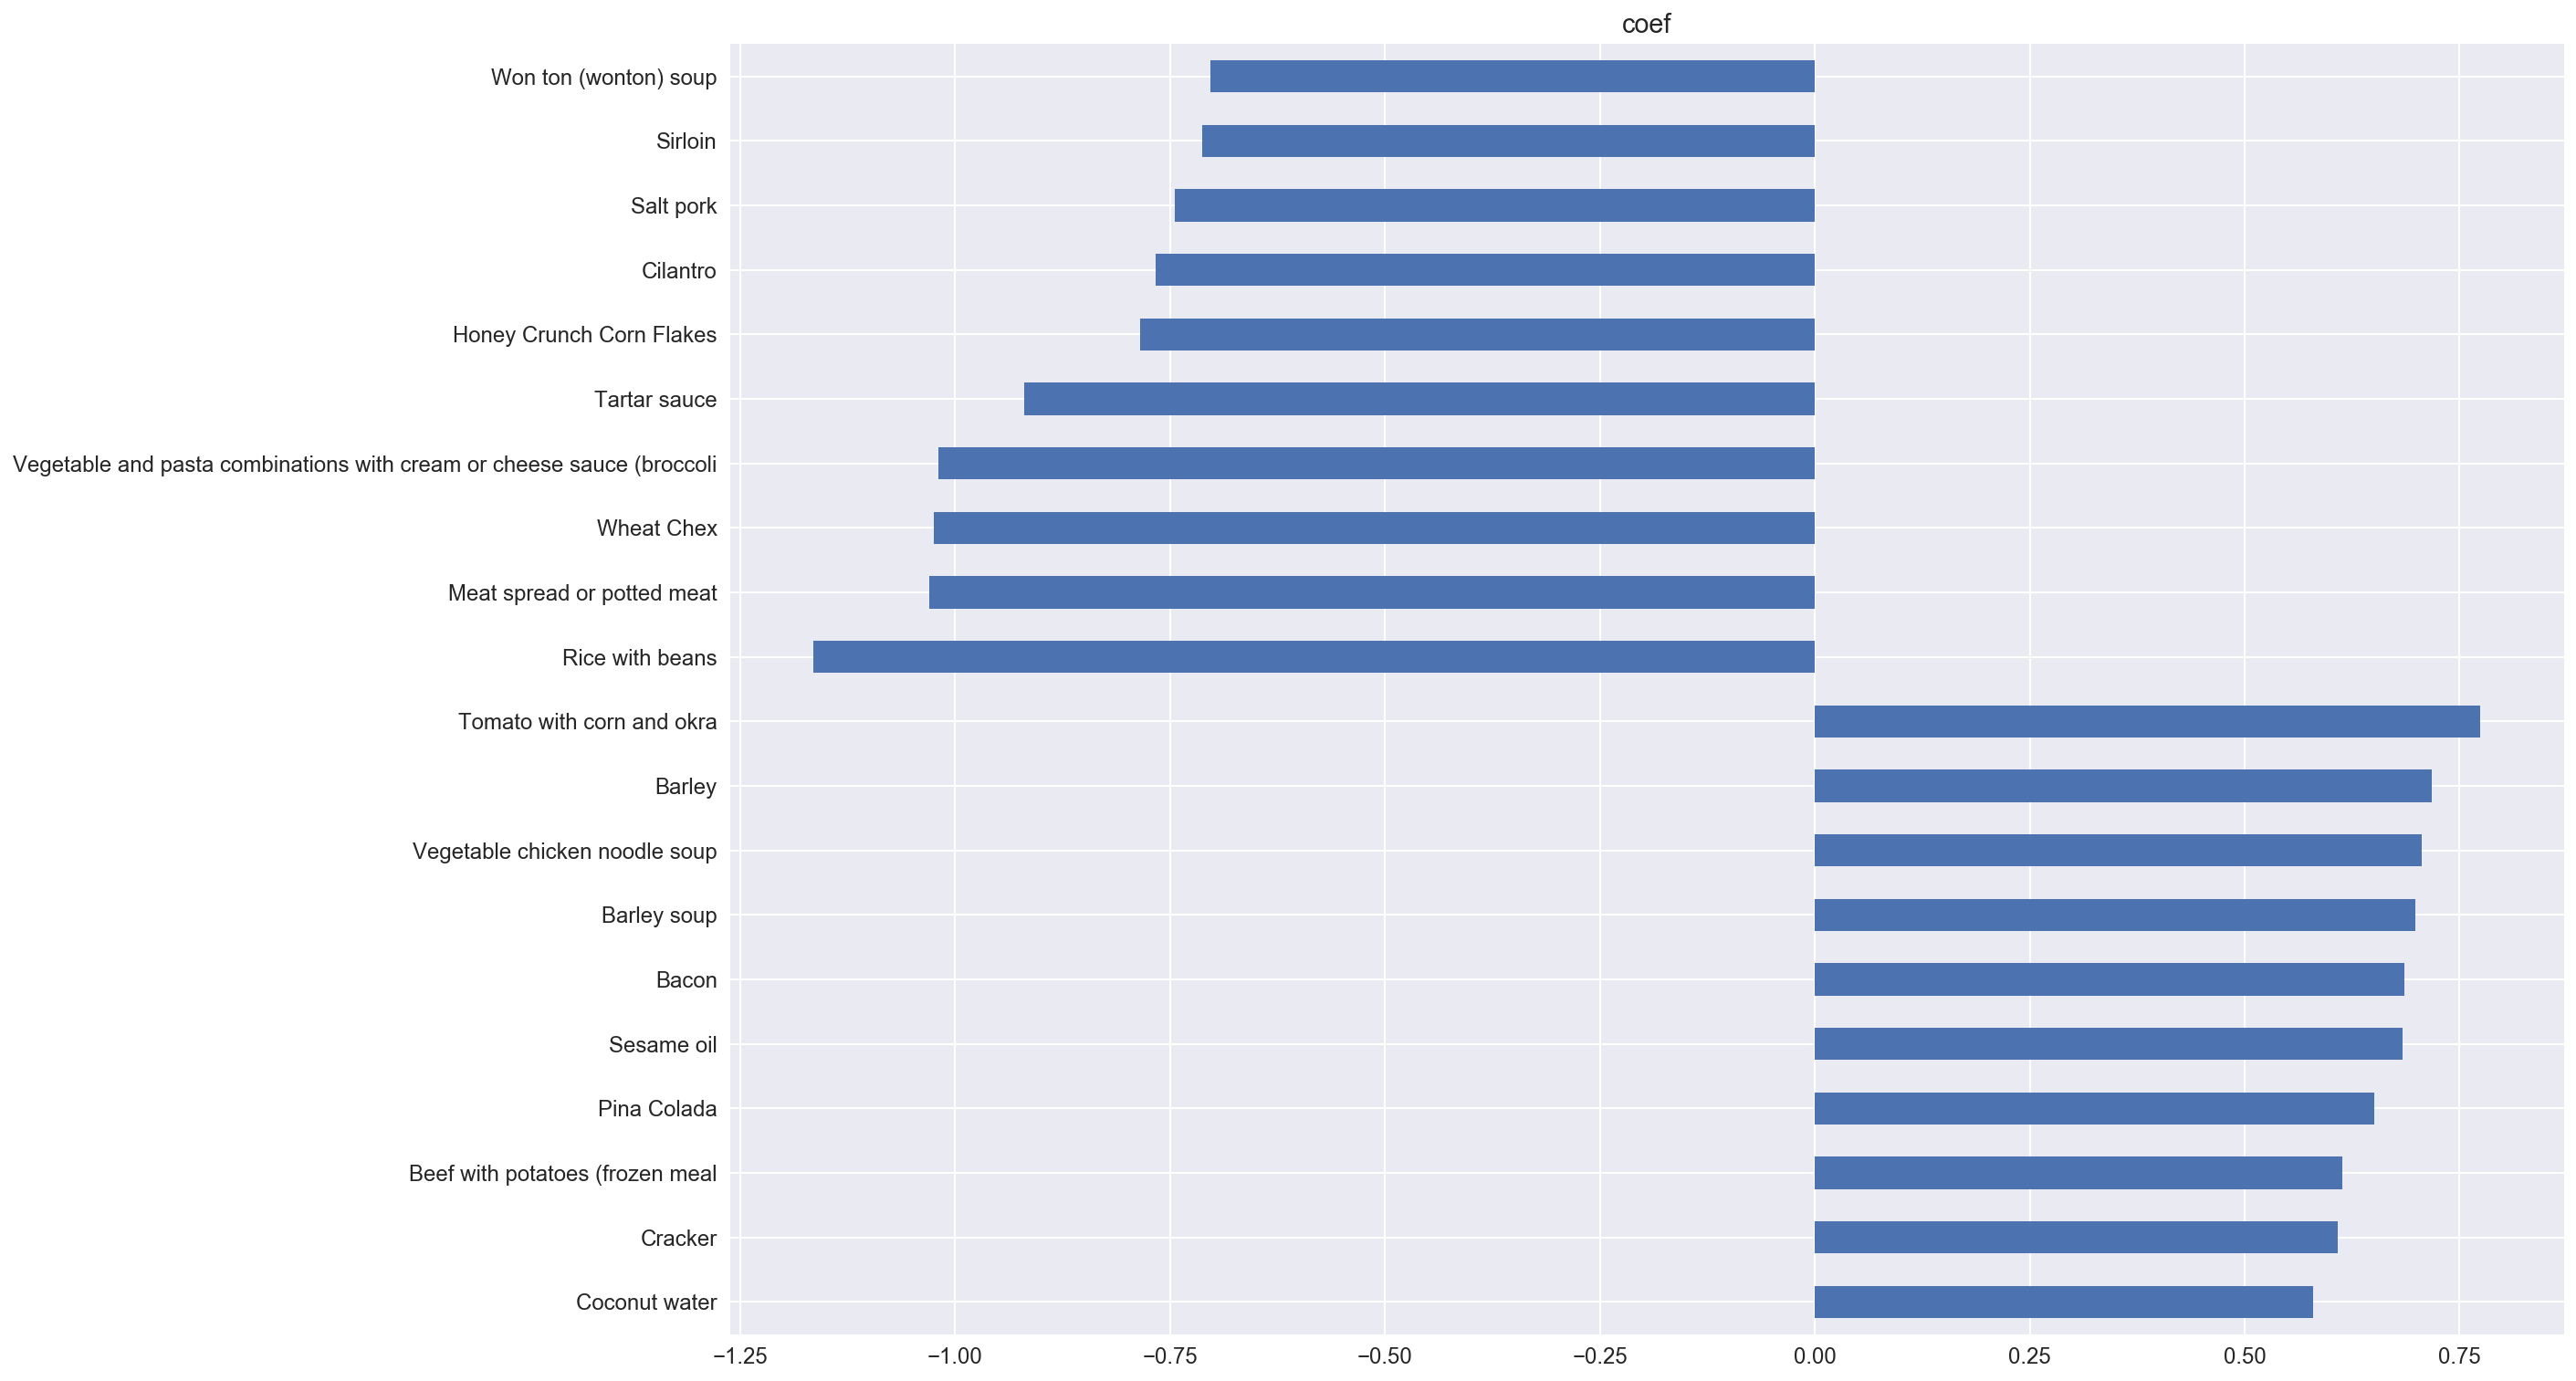

In [43]:
plot_lr_coef(lr,X_train)

In [44]:
scores=cv_scores(lr_pipe,X_train,y_train,X_test,y_test)
print('Accuracy score for logistic regression is {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(np.std(scores))))

Predicted  False  True   All
Actual                      
False        524   336   860
True         324   264   588
All          848   600  1448
             precision    recall  f1-score   support

      False       0.62      0.61      0.61       860
       True       0.44      0.45      0.44       588

avg / total       0.55      0.54      0.54      1448

Accuracy score for logistic regression is 0.5474 +/- 0.0000


### Optimization with gridsearch

The score obtain is 0.53 which is lower than baseline. Optimizing the model with gridsearch for hyperparameter tuning.

In [141]:
# Create a list of values of the regularization parameter
C = np.logspace(-4, 4, 50)

# Create a list of options for the regularization penalty
penalty = ['l1', 'l2']

# Create a dictionary of all the parameter options 
# Note has you can access the parameters of steps of a pipeline by using '__’
parameters = dict(logreg__C=C,
                  logreg__penalty=penalty)

In [142]:
clf = GridSearchCV(lr_pipe, parameters)

['logreg__fit_intercept',
 'logreg__warm_start',
 'logreg__intercept_scaling',
 'logreg__max_iter',
 'ss__with_std',
 'ss',
 'logreg__random_state',
 'logreg__verbose',
 'ss__with_mean',
 'logreg',
 'logreg__solver',
 'logreg__dual',
 'logreg__class_weight',
 'logreg__multi_class',
 'steps',
 'logreg__penalty',
 'logreg__n_jobs',
 'memory',
 'logreg__C',
 'logreg__tol',
 'ss__copy']

In [143]:
# Fit the grid search
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logreg__C': array([  1.00000e-04,   1.45635e-04,   2.12095e-04,   3.08884e-04,
         4.49843e-04,   6.55129e-04,   9.54095e-04,   1.38950e-03,
         2.02359e-03,   2.94705e-03,   4.29193e-03,   6.25055e-03,
         9.10298e-03,   1.32571e-02,   1.93070e-02,   2.81177e-02,
       ... 3.23746e+03,   4.71487e+03,
         6.86649e+03,   1.00000e+04]), 'logreg__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=

In [144]:
print('Best Penalty:', clf.best_estimator_.get_params()['logreg__penalty'])
print('Best C:', clf.best_estimator_.get_params()['logreg__C'])



('Best Penalty:', 'l2')
('Best C:', 0.00014563484775012445)


In [146]:
cv_scores(clf.best_estimator_,X_train,y_train,X_test,y_test)

Accuracy score for logistic regression is 0.6238 +/- 0.0000
Predicted  False  True   All
Actual                      
False        478   293   771
True         257   420   677
All          735   713  1448
             precision    recall  f1-score   support

      False       0.65      0.62      0.63       771
       True       0.59      0.62      0.60       677

avg / total       0.62      0.62      0.62      1448



After hyperparameter tuning, the model shows much improvement especially in predicting the True values

### Random Forest and Support vector machine classifier with default parameters.
The Logistic Regression model produce a better result after hyperparameters. Next is to try Random Forest and Support vector machine classifier. The features importance from random forest can be extracted for analysis.

In [45]:
rf = RandomForestClassifier(n_estimators=5000, random_state=0, n_jobs=-1)
svc=SVC()
rf_pipe = Pipeline(steps=[('ss',ss),('rf',rf)])
svc_pipe=Pipeline(steps=[('ss',ss),('svc',svc)])

In [ ]:
rf_pipe.fit(X_train,y_train)
svc_pipe.fit(X_train,y_train)

In [51]:
rf_pipe.score(X_test,y_test)

0.62223756906077343

In [52]:
svc_pipe.score(X_test,y_test)

0.59668508287292821

In [50]:
scores_rf=scores(rf_pipe,X_test,y_test)
scores_cv=scores(svc_pipe,X_test,y_test)

Predicted  False  True   All
Actual                      
False        785    75   860
True         472   116   588
All         1257   191  1448
             precision    recall  f1-score   support

      False       0.62      0.91      0.74       860
       True       0.61      0.20      0.30       588

avg / total       0.62      0.62      0.56      1448

Predicted  False  True   All
Actual                      
False        786    74   860
True         510    78   588
All         1296   152  1448
             precision    recall  f1-score   support

      False       0.61      0.91      0.73       860
       True       0.51      0.13      0.21       588

avg / total       0.57      0.60      0.52      1448



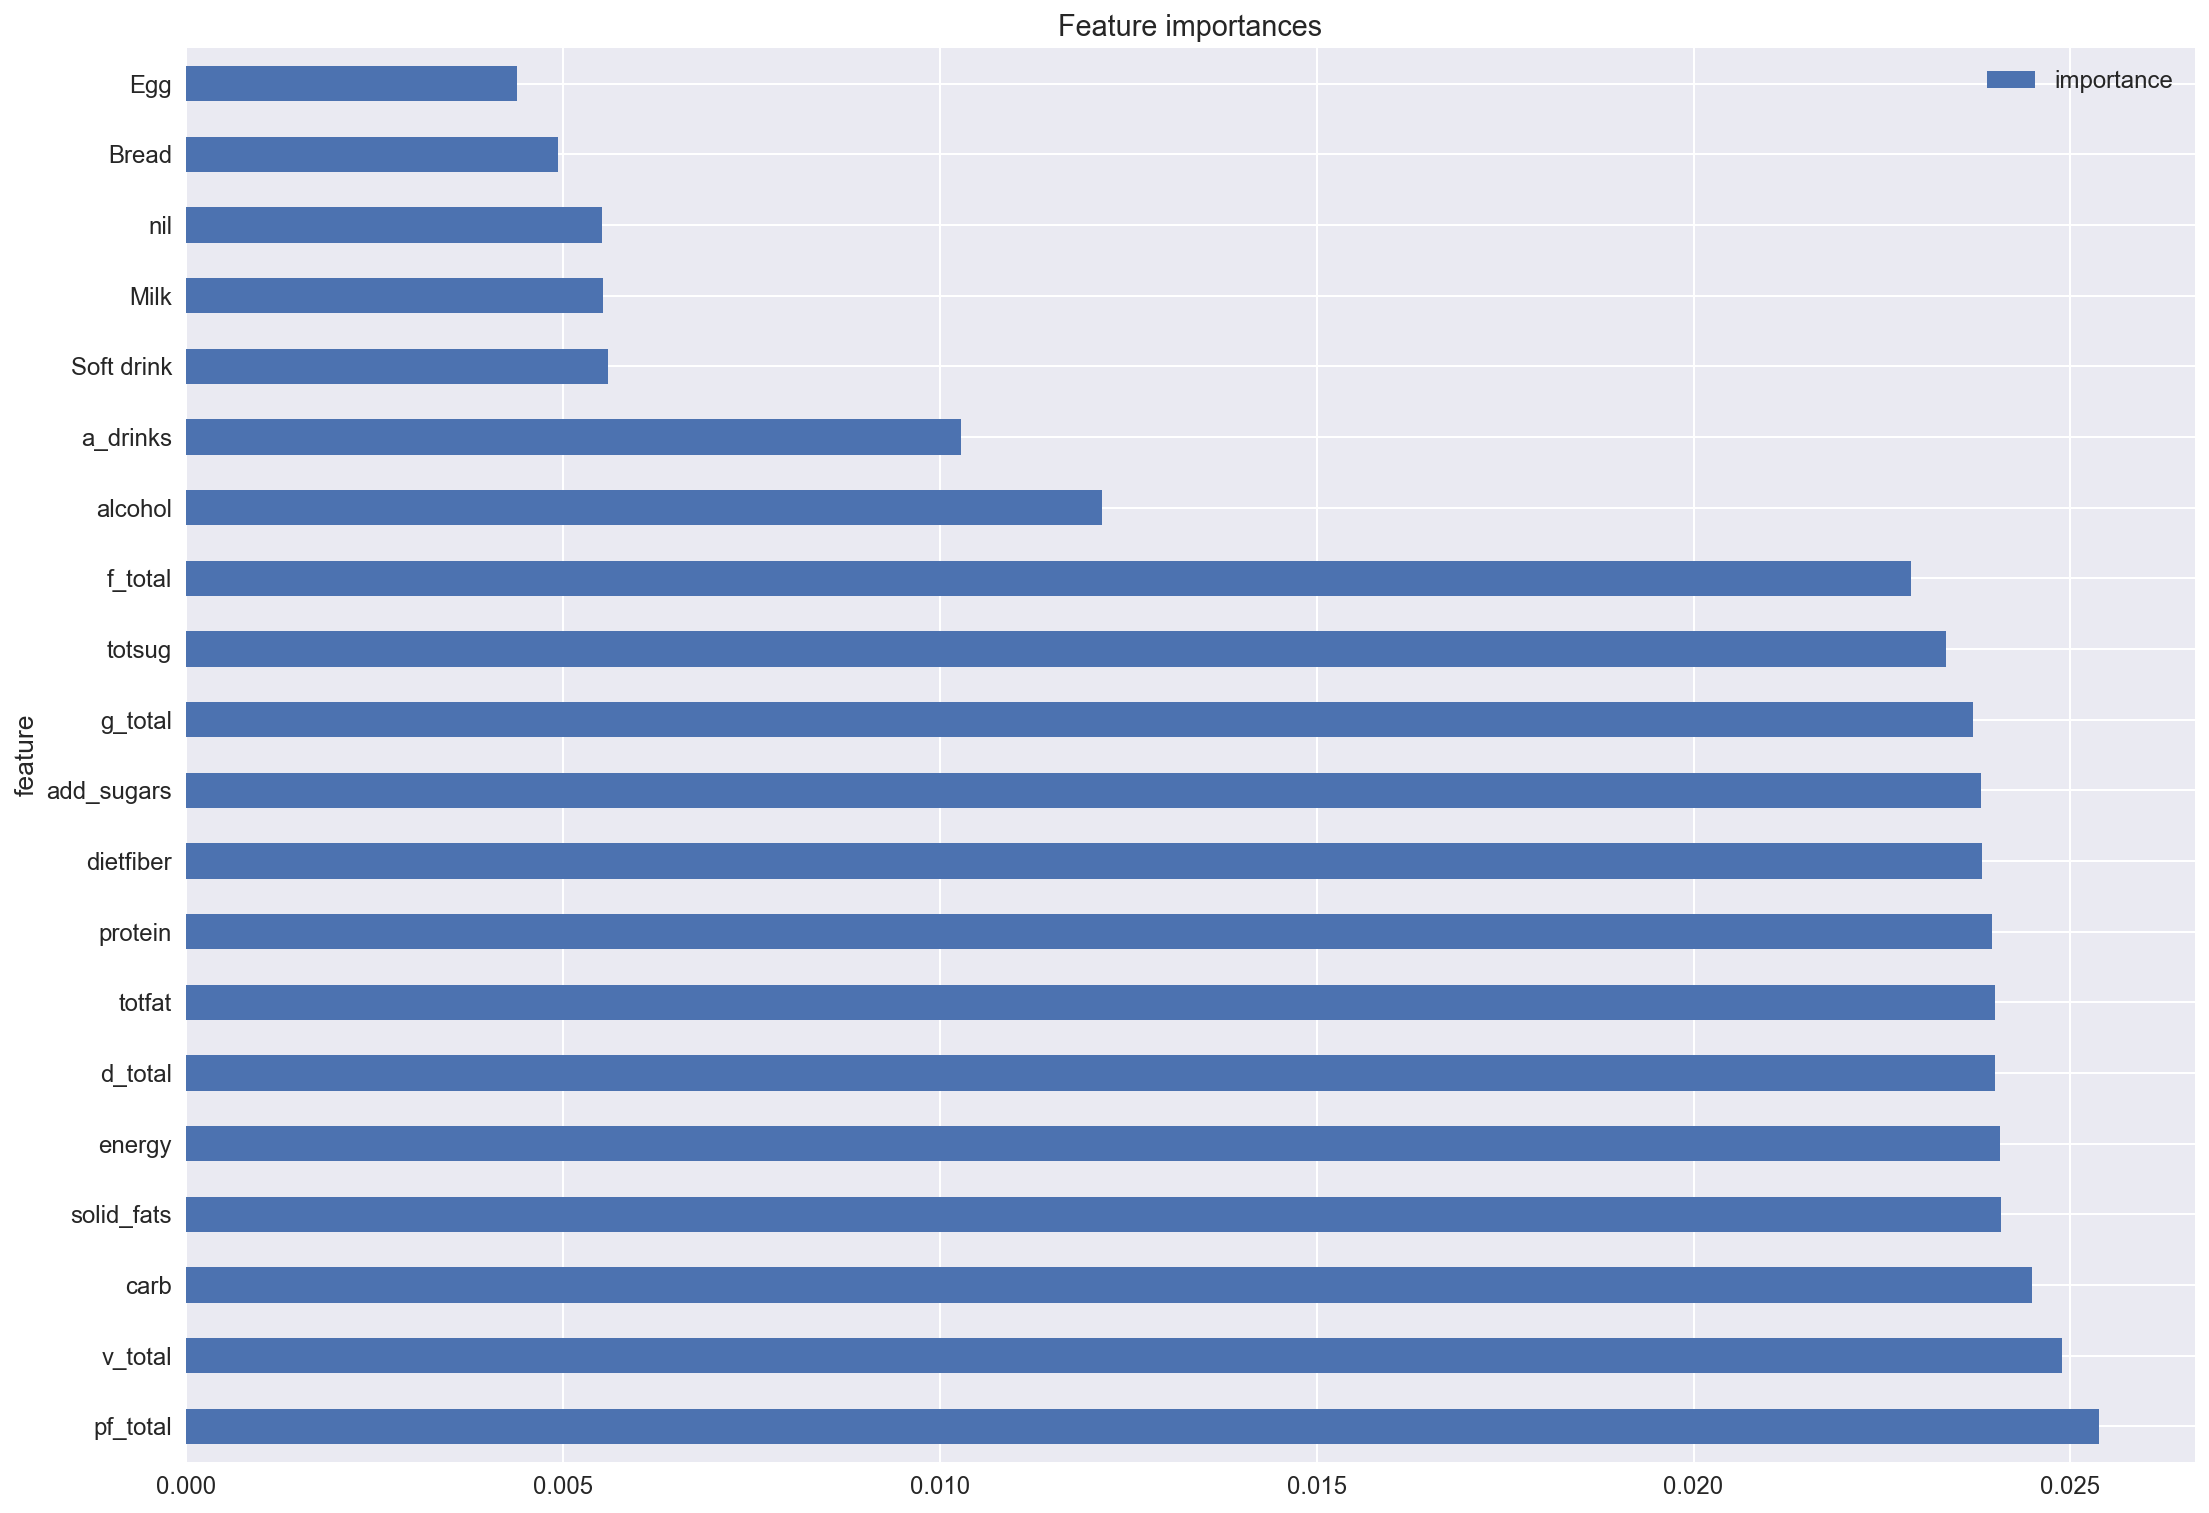

In [55]:
plot_rf_fi(rf,X_train);

While random forest score very well in predicting the False values, it fared poorer the logistic regression in predicting the True values (minority)

## PCA
Given the huge amount of features, I've decided to try and see if strongly correlated features could be reduced by Principal Component Analysis.
Create a pipeline of three steps. 
- First, standardize the data.
- Second, tranform the data with PCA.
- Third, train a logistic regression on the data.

In [100]:
pca = PCA()
pipe = Pipeline(steps=[('ss', ss), 
                       ('pca', pca), 
                       ('logistic', logistic)])

In [101]:
n_components = [40,45]
# Create a list of values of the regularization parameter
C = np.logspace(-4, 4, 50)

# Create a list of options for the regularization penalty
penalty = ['l1', 'l2']
solver=['liblinear']

# Create a dictionary of all the parameter options 
# Note has you can access the parameters of steps of a pipeline by using '__’
parameters = dict(pca__n_components=n_components, 
                  logreg__C=C,
                  logreg__penalty=penalty)

In [102]:
clf = GridSearchCV(pipe, parameters)

In [103]:
# Fit the grid search
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight='balance...y='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logistic__C': array([  1.00000e-04,   1.45635e-04,   2.12095e-04,   3.08884e-04,
         4.49843e-04,   6.55129e-04,   9.54095e-04,   1.38950e-03,
         2.02359e-03,   2.94705e-03,   4.29193e-03,   6.25055e-03,
         9.10298e-03,   1.32571e-02,   1.93070e-02,   2.81177e-02,
     ...     6.86649e+03,   1.00000e+04]), 'pca__n_components': [40, 45], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None,

In [104]:
print('Best Penalty:', clf.best_estimator_.get_params()['logistic__penalty'])
print('Best C:', clf.best_estimator_.get_params()['logistic__C'])
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])


('Best Penalty:', 'l1')
('Best C:', 1.7575106248547894)
('Best Number Of Components:', 40)


In [106]:
cv_scores(clf.best_estimator_,X_train,y_train,X_test,y_test)

Accuracy score for logistic regression is 0.6249 +/- 0.0000
Predicted  False  True   All
Actual                      
False        495   323   818
True         262   368   630
All          757   691  1448
             precision    recall  f1-score   support

      False       0.65      0.61      0.63       818
       True       0.53      0.58      0.56       630

avg / total       0.60      0.60      0.60      1448



There is a improvement when it comes to predicting the True values. However it still fare poorer when predicting the false values.

### PCA with SVM classifier

In [82]:
pca = PCA(n_components=40)
svc_pipe = Pipeline(steps=[('ss', ss), 
                       ('pca', pca), 
                       ('svc', svc)])

In [83]:
svc_pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [84]:
svc_pipe.score(X_test,y_test)

0.60980662983425415

In [85]:
scores=cv_scores(svc_pipe,X_train,y_train,X_test,y_test)
print('Accuracy score for svc is {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(np.std(scores))))

Predicted  False  True   All
Actual                      
False        772    88   860
True         477   111   588
All         1249   199  1448
             precision    recall  f1-score   support

      False       0.62      0.90      0.73       860
       True       0.56      0.19      0.28       588

avg / total       0.59      0.61      0.55      1448

Accuracy score for logistic regression is 0.6057 +/- 0.0000


Not much improvement.

## Final Model selection:
Based on accuracy score, both Logistic Regression (with hyperparameter tuning) and Random Forest (without hyperparameter tuning) come closed. 
I have decided to use Logistic Regression, base on the fact that it has a better F1-score on the prediction of True values.
However this is only the prelimary selection. Much more areas are still not expored (i.e hyperparameter tuning of random forest,etc)


<img src="https://static.independent.co.uk/s3fs-public/thumbnails/image/2017/08/03/13/lifestyle5.jpg" width="700">
 
 
 
 
## Modelling for Dietary habit prediction
We will predicting a binary variable- whether the food purchase will be above or below median healthy score,we will be using classifier model.
We create a new binary variable that is true when the score is below mean.

In [97]:
y1=y1<y1.mean()
baseline1=y1.value_counts()
baseline1=float(baseline1[0])/(baseline1[0]+baseline1[1])
baseline1

0.5540820555325321

### Logistic Regression- Default parameters
The calculated baseline is 0.55. I will  start off again using Logistic Regression.


In [106]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.7)
lr = LogisticRegression()
lr_pipe = Pipeline(steps=[('ss', ss),('logreg', lr)])

In [107]:
lr_pipe.fit(X1_train,y1_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

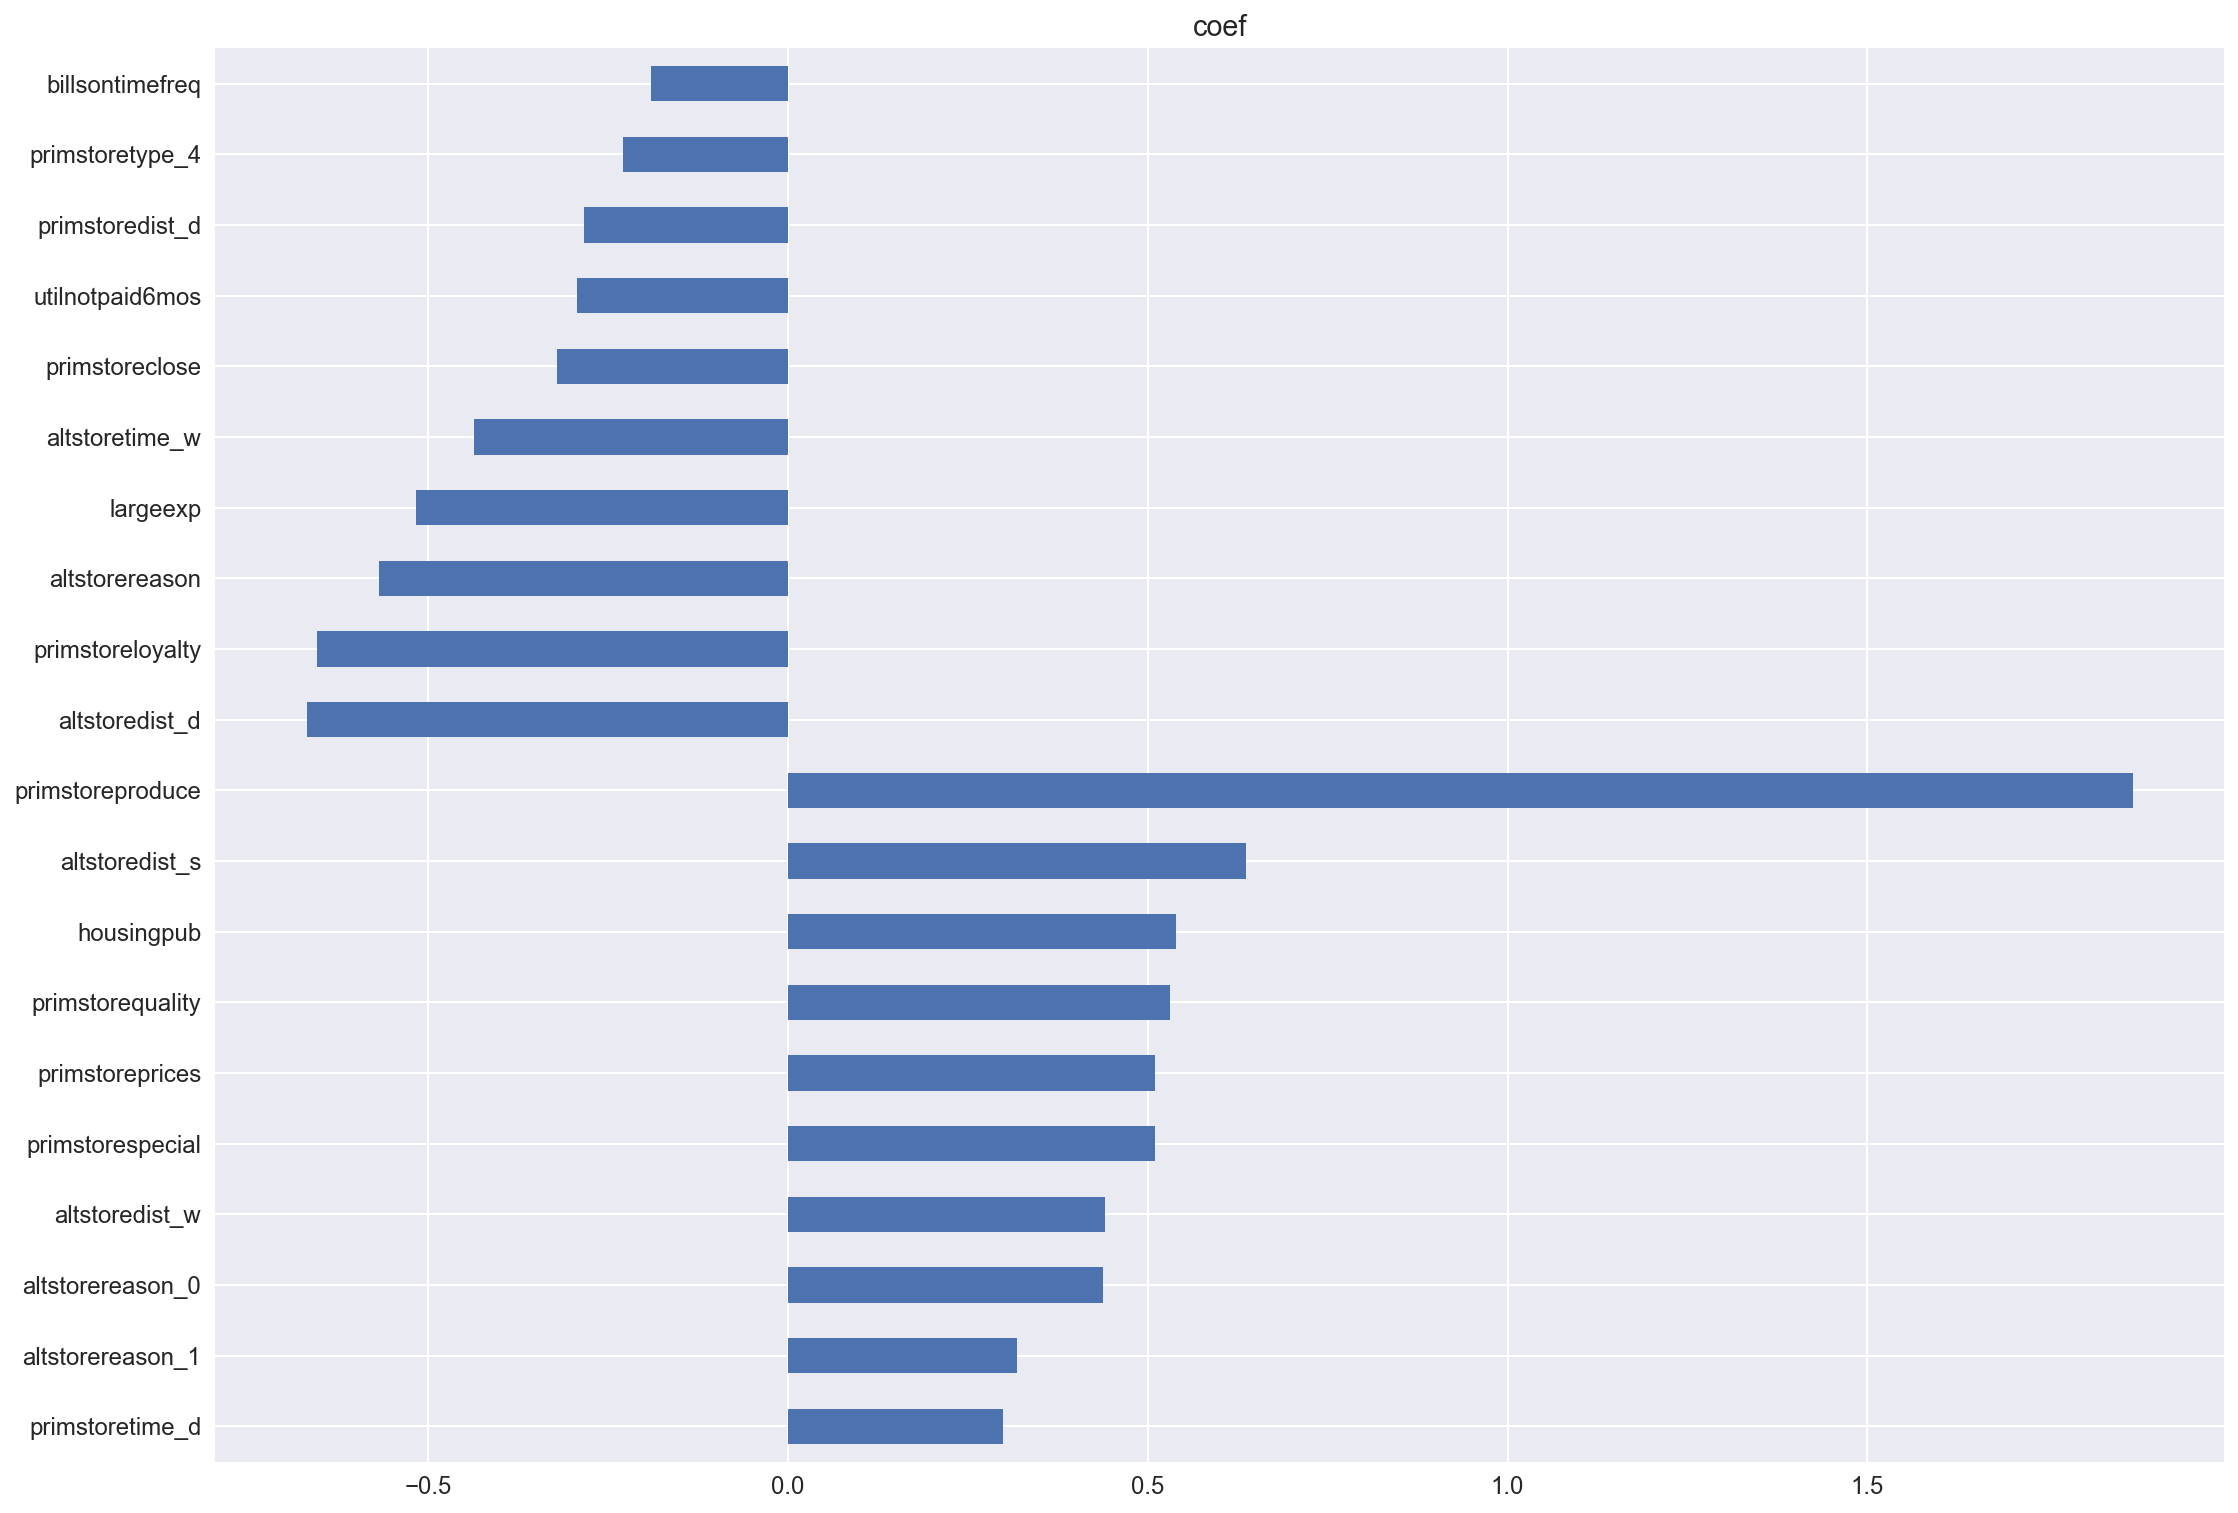

In [108]:
plot_lr_coef(lr,X1_train)

In [110]:
scores=cv_scores(lr_pipe,X1_train,y1_train,X1_test,y1_test)
print('Accuracy score for logistic regression is {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(np.std(scores))))

Predicted  False  True   All
Actual                      
False        562   259   821
True         308   319   627
All          870   578  1448
             precision    recall  f1-score   support

      False       0.65      0.68      0.66       821
       True       0.55      0.51      0.53       627

avg / total       0.61      0.61      0.61      1448

Accuracy score for logistic regression is 0.6149 +/- 0.0000


### Random Forest and Support vector machine classifier with default parameters.
The Logistic Regression model scores a 0.61, which is higher than baseline . Next is to try Random Forest and Support vector machine classifier. The features importance from random forest can be extracted for analysis.

In [111]:
rf = RandomForestClassifier(n_estimators=5000, random_state=0, n_jobs=-1)
svc=SVC()
rf_pipe = Pipeline(steps=[('ss',ss),('rf',rf)])
svc_pipe=Pipeline(steps=[('ss',ss),('svc',svc)])

In [112]:
rf_pipe.fit(X1_train,y1_train)
svc_pipe.fit(X1_train,y1_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [50]:
scores_rf=scores(rf_pipe,X1_test,y1_test)
scores_cv=scores(svc_pipe,X1_test,y1_test)

Predicted  False  True   All
Actual                      
False        785    75   860
True         472   116   588
All         1257   191  1448
             precision    recall  f1-score   support

      False       0.62      0.91      0.74       860
       True       0.61      0.20      0.30       588

avg / total       0.62      0.62      0.56      1448

Predicted  False  True   All
Actual                      
False        786    74   860
True         510    78   588
All         1296   152  1448
             precision    recall  f1-score   support

      False       0.61      0.91      0.73       860
       True       0.51      0.13      0.21       588

avg / total       0.57      0.60      0.52      1448



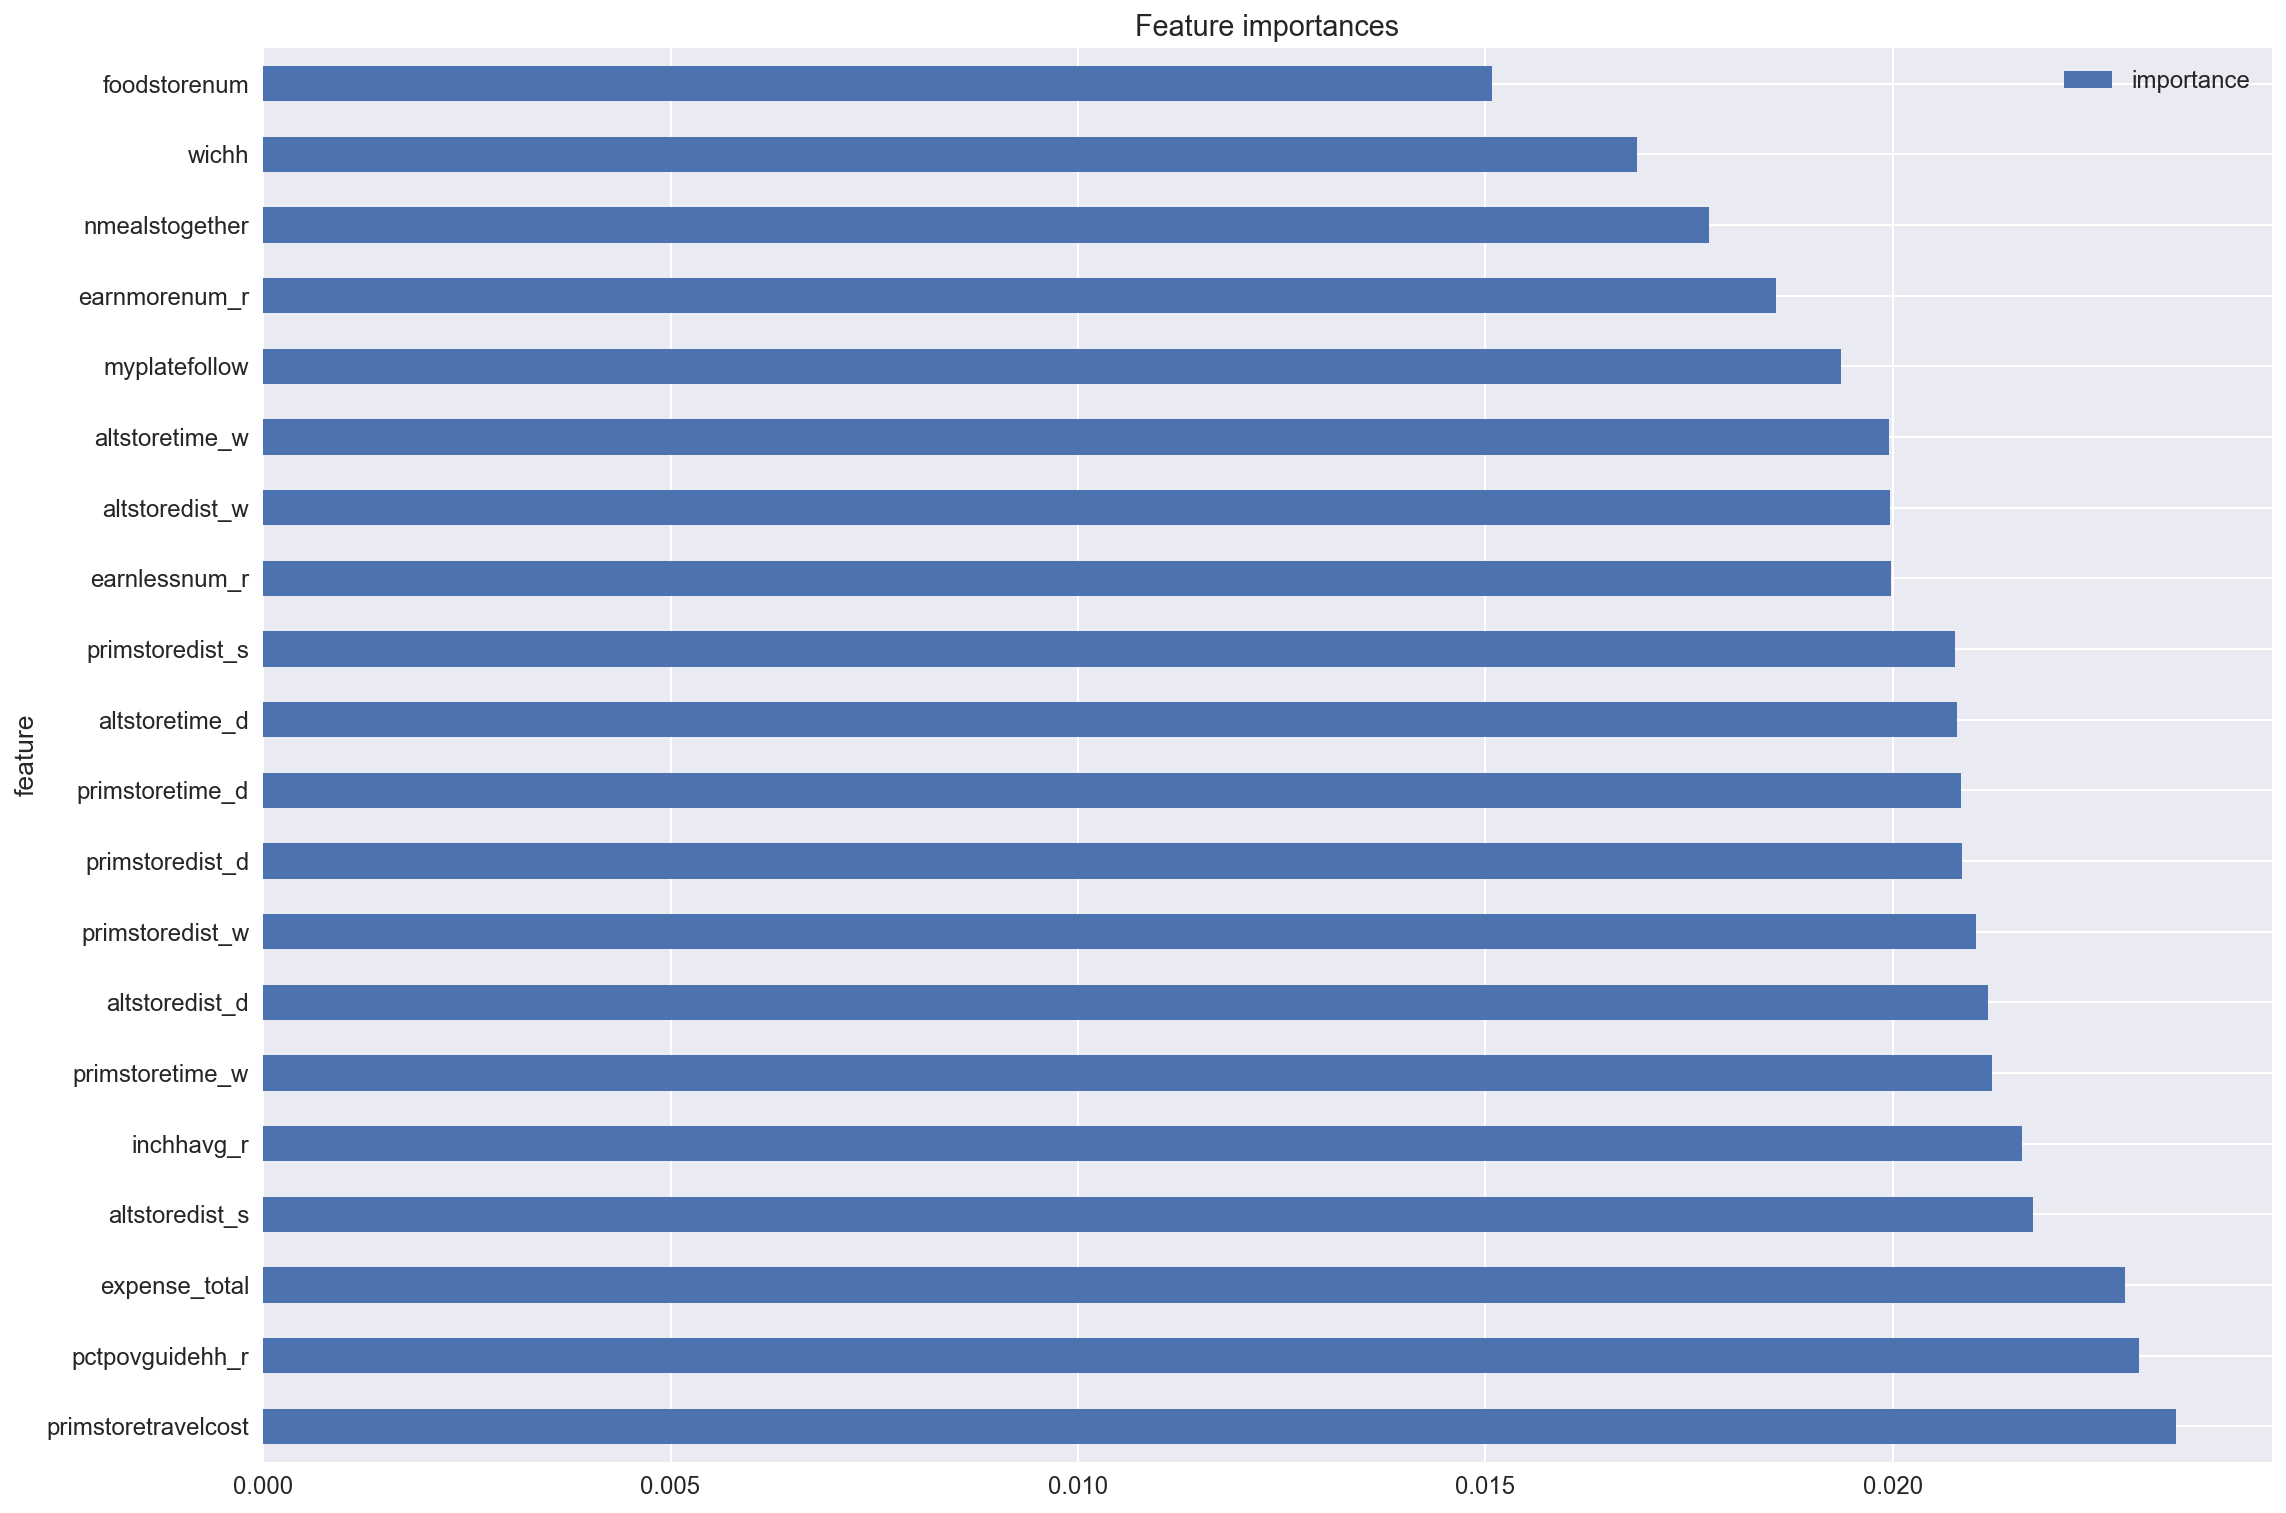

In [115]:
plot_rf_fi(rf,X1_train);

## Preliminary findings:
Based on accuracy score, all three models score around 0.61,without any hyperparameter tuning done. However Logistic Regression, again has a better F1-score on the prediction of True values.
Will continue to explore ways to improve models.